## Sommaire

### Mission 2: Analyses Descriptives
##### I.Analyse du chiffre d'affaires
<br/>I.1.[Évolution globale du chiffre d'affaires](#ca)
<br/>I.2.[Focus sur le mois d'Octobre](#oct)
<br/>I.3.[Evolution annuelle du chiffre d'affaires par catégorie](#ca_categ)
<br/>I.4.[Analyse du chiffre d'affaires globale et du nombre de ventes par catégorie](#categ_repart)
<br/>I.5.[Quelques chiffres clés](#ca_clé)
##### II.Analyse des prix des produits
<br/>II.1.[Variabilité des prix selon la catégorie de produits](#prod_prix)
<br/>II.2.[Étude détaillée des prix selon leur catégorie](#prod_detail)
##### III.Analyse des ventes
<br/>III.1.[Nombre de sessions de ventes par mois](#nb_vente)
<br/>III.2.[Montant du panier moyen au cours de la période](#prix_panier_moyen)
<br/>III.3.[Montant du panier moyen par mois](#prix_panier_moyen_mois)
<br/>III.4.[Taille du panier moyen au cours de l'année](#taille_panier)
<br/>III.5.[Taille du panier moyen par mois](#taille_panier_mois)
<br/>III.6.[Fréquence du nombre d'articles achetés](#freq_prod)
<br/>III.7.[Courbe de Lorenz et indice de Gini](#lorenz)
##### IV.Analyse des clients
<br/>IV.1.[Nombre de clients selon leur âge](#age)
<br/>IV.2.[Pyramide des âges selon le genre des clients](#pyramide)
<br/>IV.3.[Etude détaillée des âge selon le sexe des clients](#detail)
##### V.[Conclusion](#conclusion)

### Mission 3: Étude des Corrélations
<br/>I.[Suppression des Outliers](#outliers)
##### II.Sexe des clients et catégories de produits achetés
<br/>II.1.[Tableau de contingence réel](#cont1)
<br/>II.2.[Tableau de contingence théorique](#cont_eff1)
<br/>II.3.[Calcul du chi-2](#chi2_1)
<br/>II.4.[Tableau de contingence coloré](#cont_color1)
##### III.Âge des clients et montant total des achats
<br/>III.1.[Diagramme de dispersion](#disper1)
<br/>III.2.[Calcul du coefficient de Pearson et du R²](#coef1)
<br/>III.3.[Tranches d'âges et montant total des achats](#boxplot1)
<br/>III.4.[Calcul de l'eta-carré](#eta1)
##### IV.Âge des clients et fréquences d'achats
<br/>IV.1.[Diagramme de dispersion](#disper2)
<br/>IV.2.[Calcul du coefficient de Pearson et du R²](#coef2)
<br/>IV.3.[Tranches d'âges et montant total des achats](#boxplot2)
<br/>IV.4.[Calcul de l'eta-carré](#eta2)
##### V.Âge des clients et taille du panier moyen
<br/>V.1.[Diagramme de dispersion](#disper3)
<br/>V.2.[Calcul du coefficient de Pearson et du R²](#coef3)
<br/>V.3.[Tranches d'âges et montant total des achats](#boxplot3)
<br/>V.4.[Calcul de l'eta-carré](#eta3)
##### VI.Âge des clients et catégories de produits achetés
<br/>VI.1.[Dispersion des âges des clients par catégories de produits achetés](#boxplot4)
<br/>VI.2.[Calcul de l'eta-carré](#eta4)
<br/>VI.3.[Tableau de contingence réel](#cont2)
<br/>VI.4.[Tableau de contingence théorique](#cont_eff2)
<br/>VI.5.[Calcul du chi-2](#chi2_2)
<br/>VI.6.[Tableau de contingence coloré](#cont_color2)
##### VII.[Conclusion de l'analyse de corrélation](#conclusion2)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns
from matplotlib import pylab
import matplotlib.dates as mdates
import datetime as dt
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.axes as ax
from matplotlib.pylab import arange, plot

In [2]:
#importation des fichiers
transactions = pd.read_csv('transactions_final.csv')
products =  pd.read_csv('products_final.csv')
customers = pd.read_csv('customers_final.csv')
overview = pd.read_csv('overview_final.csv')

In [3]:
overview.drop(columns=['Unnamed: 0'])
transactions.drop(columns=['Unnamed: 0'])
products.drop(columns=['Unnamed: 0'])
customers.drop(columns=['Unnamed: 0'])

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8616,c_7920,m,1956
8617,c_7403,f,1970
8618,c_5119,m,1974
8619,c_5643,f,1968


## Analyse du chiffre d'affaires

<br/> Définissons des paramètres commun à chacun de nos graphiques.

In [4]:
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'larger',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

sns.set_palette('Dark2')

In [5]:
#Conversion de la colonne "date" en datetime
overview['date']=pd.to_datetime(overview['date'])

### Evolution du chiffre d'affaires au cours de l'année<a id='ca'></a>

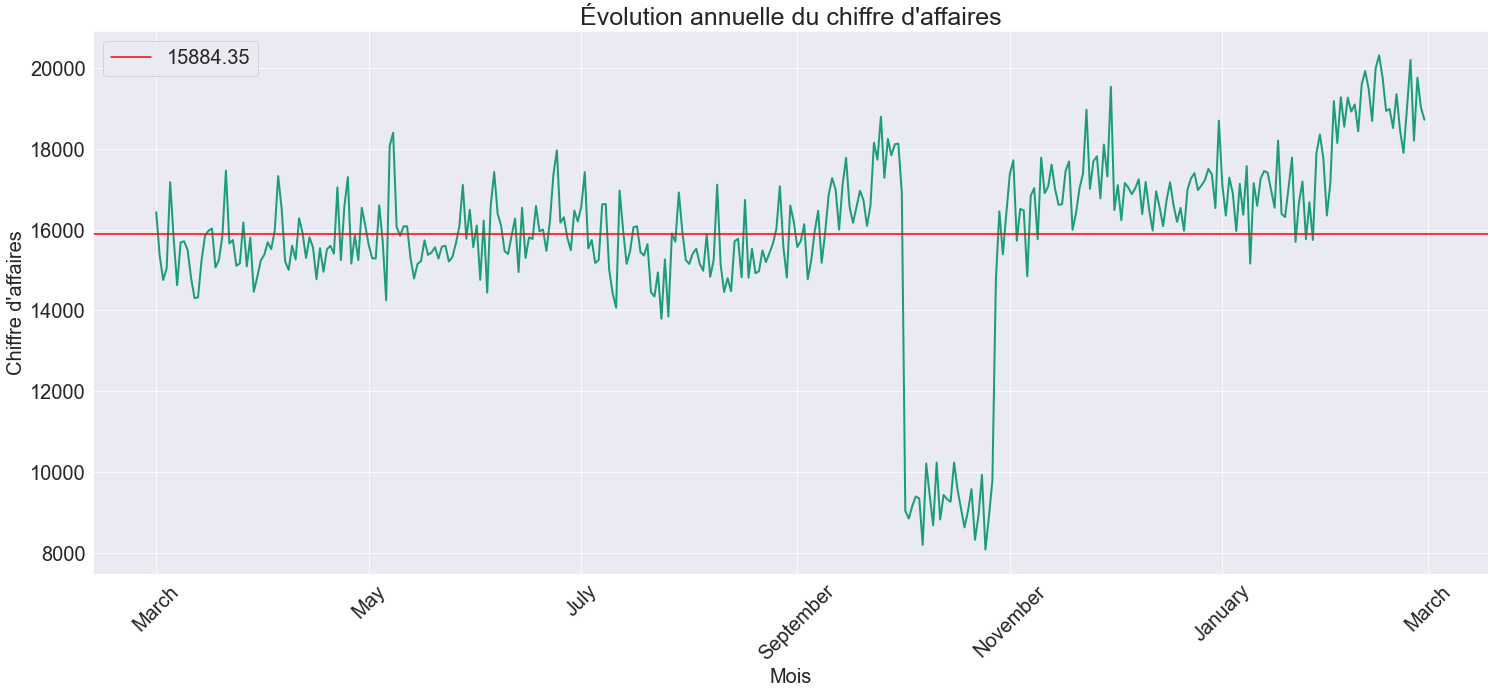

In [6]:
overview_ca = pd.DataFrame(overview.groupby('date').sum()['price']).reset_index()

sns.set_style('darkgrid')
plt.figure(figsize = (25,10))

sns.lineplot(x=overview_ca['date'], y=overview_ca['price'],data=overview_ca, sort=False,linewidth=2)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
dtFmt = mdates.DateFormatter('%B')
plt.gca().xaxis.set_major_formatter(dtFmt)

#ligne de moyenne
mean=round(overview_ca['price'].mean(),2)
plt.axhline(mean, color = 'r', linestyle = '-',label=str(mean))

plt.title('Évolution annuelle du chiffre d\'affaires', fontsize=25)
plt.xlabel('Mois',fontsize=20)
plt.ylabel('Chiffre d\'affaires',fontsize=20)
plt.legend(fontsize=20)

plt.savefig('1 - Evolution du CA annuelle.jpg')
            
plt.show()

<br/> Nous observons une évolution du chiffre d'affaires plutôt stable sur l'année mais avec une chute du CA importante lors du mois d'Octobre.
<br/>Regardons cela de plus près.

### Focus sur le chiffre d'affaires du mois d'Octobre<a id='oct'></a>

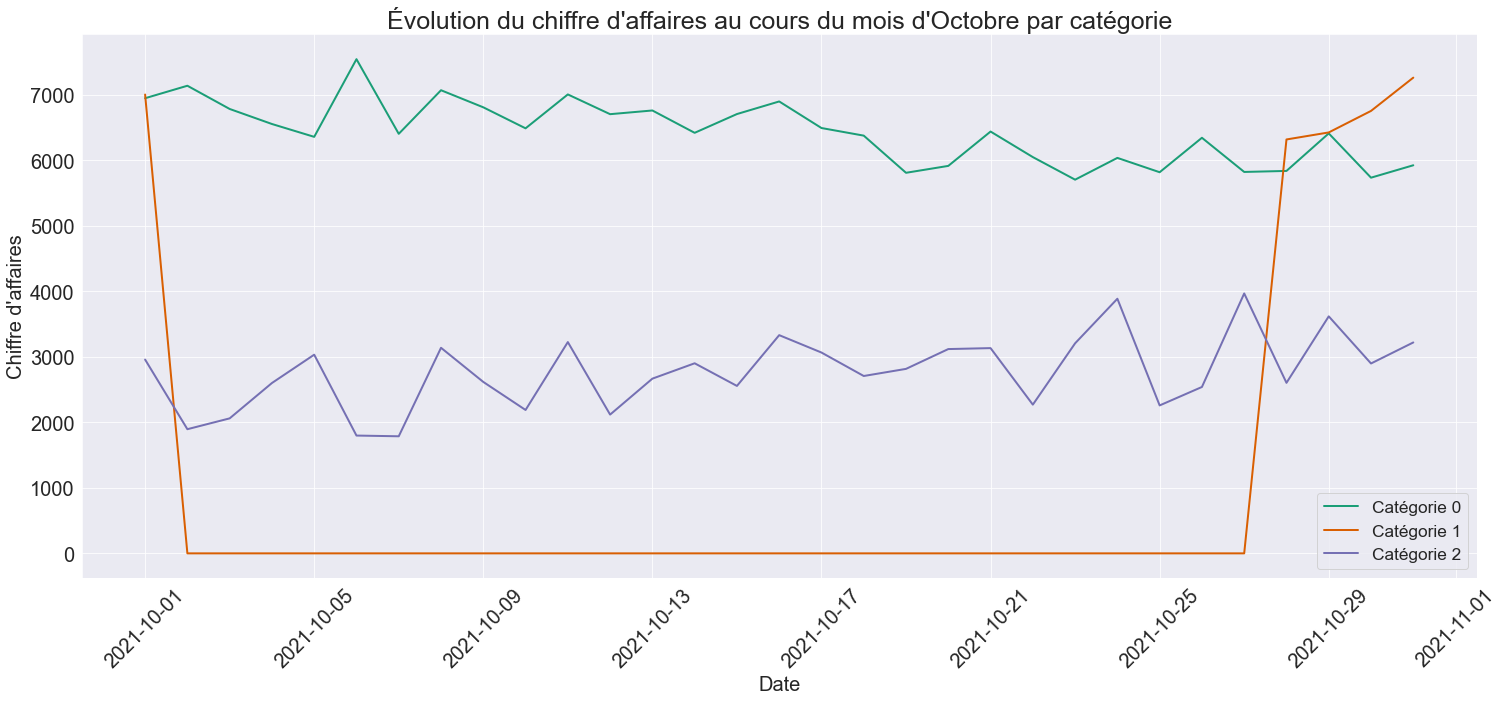

In [7]:
temp = overview[overview['month_per_year'].str.contains('October')]
temp = temp.pivot_table(index=['date'],columns=['categ'],values=['price'],aggfunc=sum).reset_index().fillna(0)
temp.columns=['date', 'categorie 0', 'categorie 1', 'categorie 2']

plt.figure(figsize = (25,10))

sns.lineplot('date', 'categorie 0', data=temp, marker='', markersize=12, linewidth=2,label='Catégorie 0')
sns.lineplot('date', 'categorie 1', data=temp, marker='', linewidth=2,label='Catégorie 1')
sns.lineplot('date', 'categorie 2', data=temp, marker='', linewidth=2,label='Catégorie 2')
plt.title('Évolution du chiffre d\'affaires au cours du mois d\'Octobre par catégorie', fontsize=25)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Date',fontsize=20)
plt.ylabel('Chiffre d\'affaires',fontsize=20)

plt.savefig('2 - Evolution du CA Octobre.jpg')

plt.show()

In [ ]:
overview['month_per_year'].str.contains('October')-overview['month_per_year'].str.contains('September')/overview['month_per_year'].str.contains('Sep')

<br/> Nous observons qu'il n'y a aucune vente de produits de la catégorie 1 en Octobre, il serait judicieux de vérifier s'il s'agit effectivement d'un désinterêt pour cette catégorie ou juste une erreur dans les données en interne.

### Evolution annuelle du chiffre d'affaires par catégories<a id='ca_categ'></a>

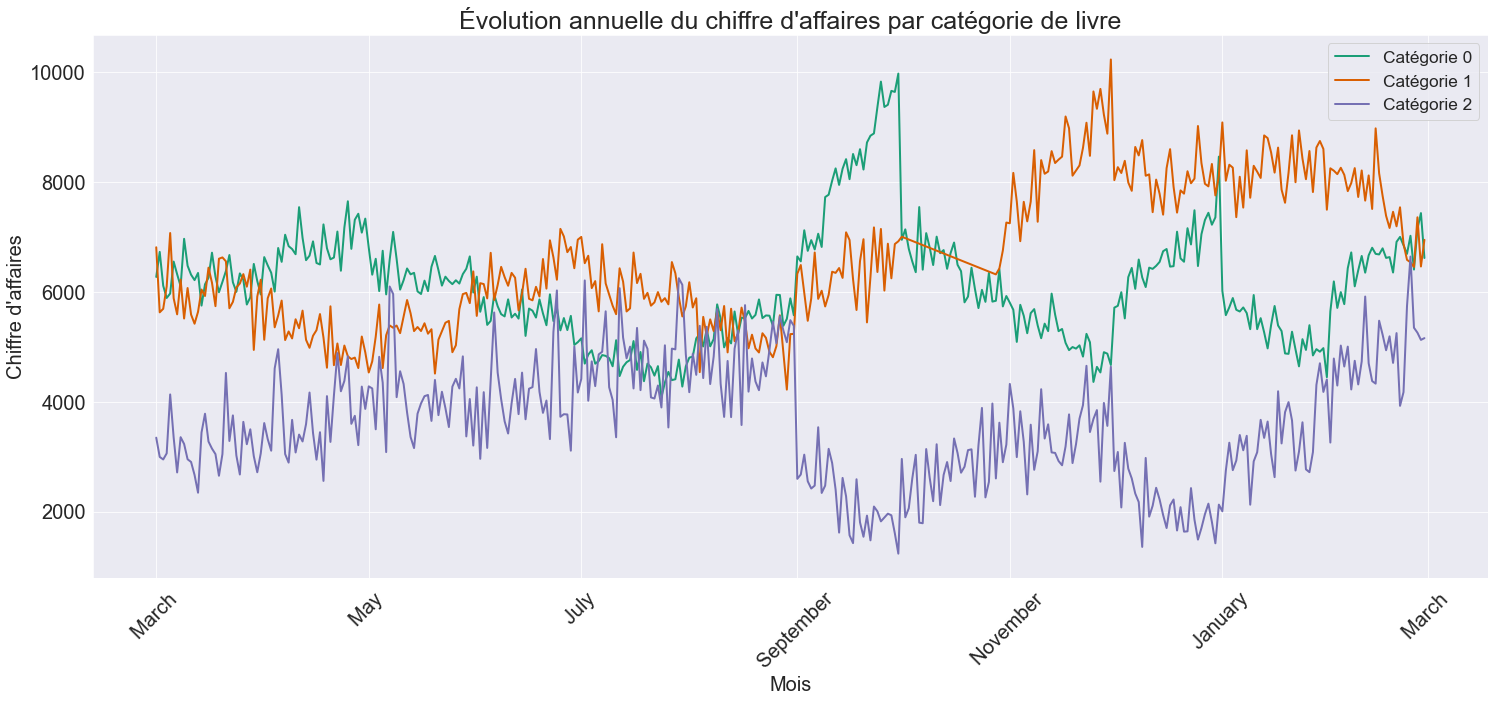

In [8]:
ca_categ = overview.pivot_table(index=['date'],columns=['categ'],values=['price'],aggfunc=sum).reset_index()
ca_categ.columns=['date', 'categ_0', 'categ_1', 'categ_2']


plt.figure(figsize = (25,10))
sns.lineplot('date', 'categ_0', data=ca_categ, marker='', markersize=12, linewidth=2,label='Catégorie 0',sort=False)
sns.lineplot('date', 'categ_1', data=ca_categ, marker='', linewidth=2,label='Catégorie 1')
sns.lineplot('date', 'categ_2', data=ca_categ, marker='', linewidth=2,label="Catégorie 2")

plt.title('Évolution annuelle du chiffre d\'affaires par catégorie de livre',fontsize=25)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
dtFmt = mdates.DateFormatter('%B ')
plt.gca().xaxis.set_major_formatter(dtFmt)

plt.xlabel('Mois',fontsize=20)
plt.ylabel('Chiffre d\'affaires',fontsize=20)

plt.savefig('3 - Evolution du CA annuelle par catégorie.jpg')

plt.show()

<br/> La catégorie 0 et 1 sont celles qui sont les plus rentables. La catégorie 2, quant à elle, dynamise de manière moins important le chiffre d'affaires. De plus, comme vu précedemment, il y a bien une baisse du chiffre d'affaires en Octobre sur la catégorie 1 mais également sur les autres catégories, même si celle-ci est moins flagrante et impact moins "brutalement" le chiffre d'affaires globale.

### Analyse du chiffre d'affaires globale et du nombre de ventes par catégorie<a id='categ_repart'></a>

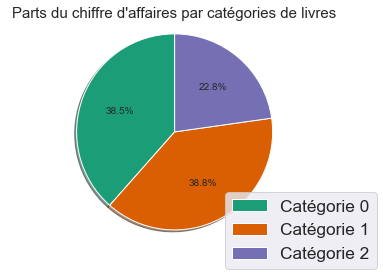

In [9]:
overview.groupby(['categ']).sum().plot(kind='pie',y='price',autopct=lambda x: str(round(x, 1))+'%', shadow=True, startangle=90,labels=['','','',''])
plt.title('Parts du chiffre d\'affaires par catégories de livres', fontsize=15)
labels = 'Catégorie 0', 'Catégorie 1', 'Catégorie 2'
plt.gca().axis('equal')
plt.legend(labels, bbox_to_anchor=(1,0), loc='lower right', 
                          bbox_transform=plt.gcf().transFigure)
plt.ylabel('')

plt.savefig('4 - Part du CA par catégorie.jpg')

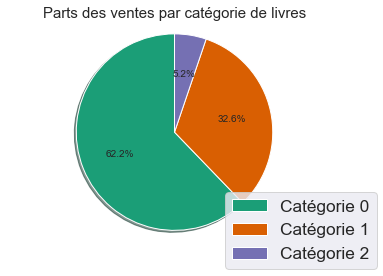

In [10]:
overview['categ'].value_counts(normalize=True).plot(kind='pie', autopct=lambda x: str(round(x, 1))+'%', shadow=True, startangle=90,labels=['','','',''])
plt.title('Parts des ventes par catégorie de livres', fontsize=15)
plt.gca().axis('equal')
plt.legend(labels, bbox_to_anchor=(1,0), loc='lower right', 
                          bbox_transform=plt.gcf().transFigure)
plt.ylabel('',fontsize=13)

plt.savefig('5 - Part des ventes par catégorie.jpg')

<br/>Nous observons une dominance des catégories 0 et 1 qui représentent près de 80% du chiffre d'affaires. Cependant, on remarque que la catégorie 2 ne représente que 5% des ventes mais près de 23% du chiffre d'affaires. Les produits de cette catégories seraient-ils plus chers ?

### Quelques chiffres clés<a id='ca_clé'></a>

In [11]:
#Chiffre d'affaires globale
overview_ca['price'].sum().round(2)

5797785.96

In [12]:
#Chiffre d'affaires de la catégorie 0
ca_categ['categ_0'].sum().round(2)

2230930.84

In [13]:
#Chiffre d'affaires de la catégorie 1
ca_categ['categ_1'].sum().round(2)

2247384.41

In [14]:
#Chiffre d'affaires de la catégorie 2
ca_categ['categ_2'].sum().round(2)

1319470.71

## Analyse des prix des produits<a id='prod_prix'></a>

<br/>Nous allons nous baser sur le fichier "products" qui regroupent l'ensemble des produits.

### Analyse de la variabilité des prix selon la catégorie de produits

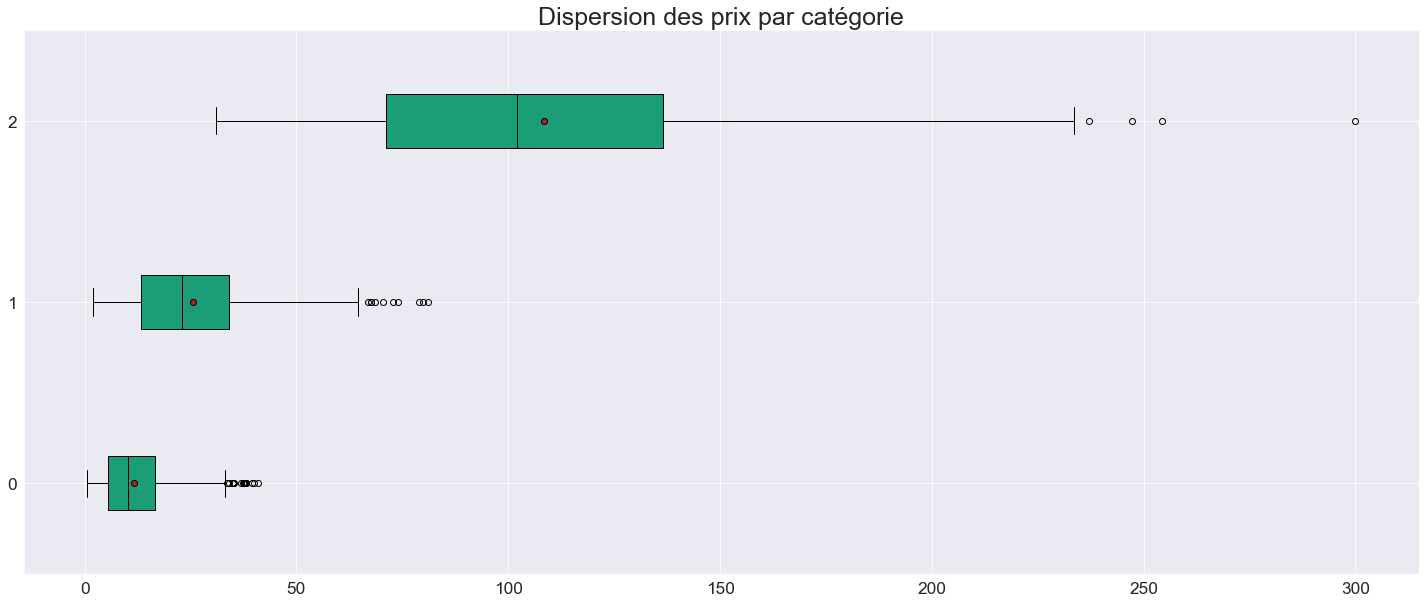

In [15]:
#mesure de dispersion
X = 'categ' # qualitative
Y = 'price' # quantitative

modalites = products[X].unique()
groupes = []
for m in modalites:
    groupes.append(products[products[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':'black'}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.figure(figsize = (25,10))
plt.title('Dispersion des prix par catégorie',fontsize=25)
plt.boxplot(groupes, labels=modalites, showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.savefig('6 - Boxplot catégorie_prix.jpg')

plt.show()

<br/>Comme vu dans le graphique précédent, ce sont les produits de la catégorie 2 qui ont un prix plus élevé. Egalement, la boite de cette catégorie est plus étirée, il y a donc des prix plus hétérogènes que pour les autres catégories. La catégorie 0 est la moins cher. Analysons désormais les prix des produits par catégorie de façon plus précise.

### Etude détaillée des prix des produits selon leur catégorie<a id='prod_detail'></a>

--------------------
0
nb:
 2308
moy:
 11.732794627383296
med:
 10.32
mod:
 0    4.99
dtype: float64
min:
 0.62
max:
 40.99
var:
 57.215847172726775
ect:
 7.564115756169175
skw:
 0.8387209779498822
kur:
 0.3324478551097827


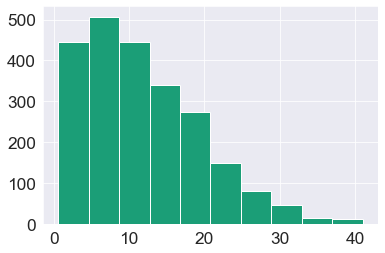

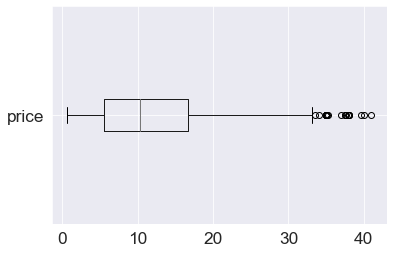

--------------------
1
nb:
 739
moy:
 25.531420838971624
med:
 22.99
mod:
 0    22.99
1    32.99
dtype: float64
min:
 2.0
max:
 80.99
var:
 237.61364304211
ect:
 15.414721633623813
skw:
 0.8120109621070365
kur:
 0.2993533794236898


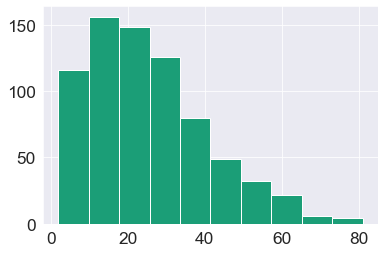

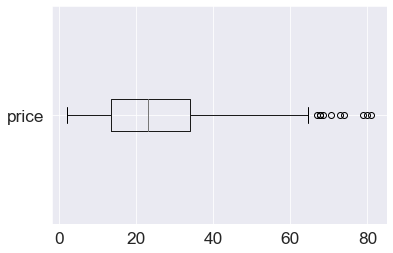

--------------------
2
nb:
 239
moy:
 108.35468619246883
med:
 101.99
mod:
 0    50.99
1    68.99
2    69.99
dtype: float64
min:
 30.99
max:
 300.0
var:
 2446.0578977048704
ect:
 49.45763740520639
skw:
 0.9310209579538592
kur:
 0.808968484300689


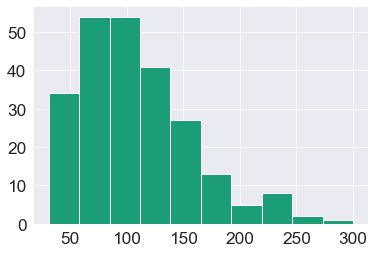

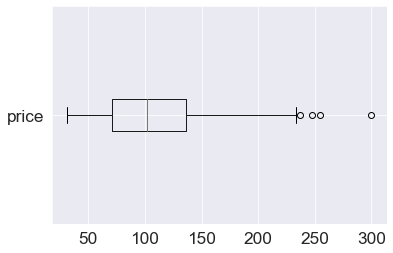

In [16]:
for cat in products['categ'].unique():
    subset = products[products.categ == cat]
    print('-'*20)
    print(cat)
    print('nb:\n',subset['categ'].count())
    print('moy:\n',subset['price'].mean())
    print('med:\n',subset['price'].median())
    print('mod:\n',subset['price'].mode())
    print('min:\n',subset['price'].min())
    print('max:\n',subset['price'].max())
    print('var:\n',subset['price'].var(ddof=0))
    print('ect:\n',subset['price'].std(ddof=0)) #écart de prix avec la moyenne
    #mesure de forme
    print('skw:\n',subset['price'].skew())
    print('kur:\n',subset['price'].kurtosis())
    subset['price'].hist()
    plt.show()
    subset.boxplot(column='price', vert=False)
    plt.show()

Catégorie 0 : 2308 produits avec une moyenne de prix de 11,7€ et des prix allant de 0,62€ à 50€. Le skewness est supérieur à 0, la distribution est donc étalée à droite. Le kurtosis empirique est supérieur à 0, les observations sont donc plus concentrées que pour une distribution normale.

Catégorie 1 : 739 produits avec une moyenne de prix de 25,5 avec des prix allant de 2€ à 81€. Le skewness est supérieur à 0, la distribution est donc étalée à droite. Le kurtosis empirique est supérieur à 0, les observations sont donc plus concentrées que pour une distribution normale.

Catégorie 2 : 239 produits avec une moyenne de prix de 108,3€ avec des prix allant de 31€ à 300€. Le skewness est supérieur à 0, la distribution est donc étalée à droite. Le kurtosis empirique est supérieur à 0, les observations sont donc plus concentréesque pour une distribution normale.

On remarque des écart-types plutôt élevés pour chacune des catégories, nous pouvons en déduire que les prix ne sont pas homogènes, surtout pour la catégorie 2 comme vu précedemment. 

## Analyse des ventes par client

### Nombre de sessions de vente par mois<a id='nb_vente'></a>

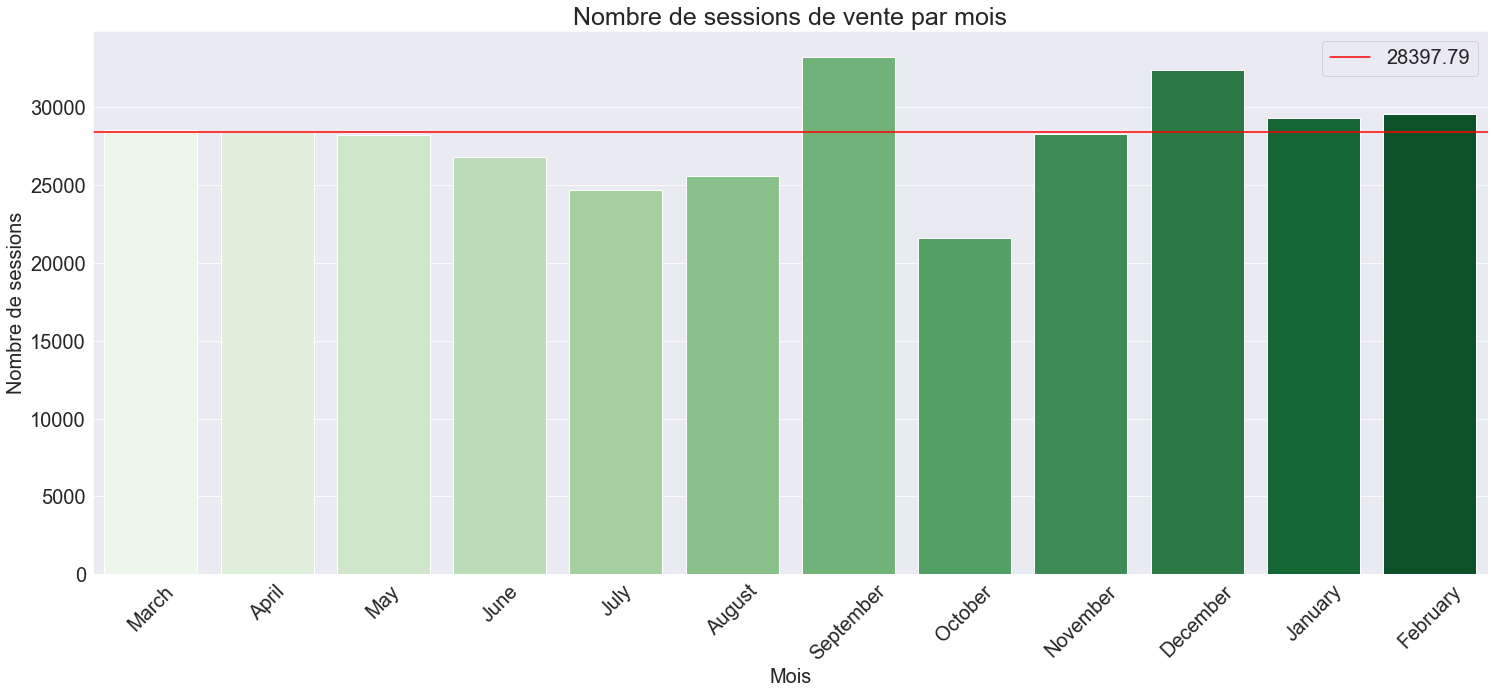

In [17]:
plt.figure(figsize = (25,10))
sns.barplot(x=overview['month_per_year'], y=overview['sessions_month'],data=overview, palette='Greens')

#ligne de moyenne
mean=round(overview['sessions_month'].mean(),2)
plt.axhline(mean, color = 'r', linestyle = '-',label=str(mean))

plt.title('Nombre de sessions de vente par mois',fontsize=25)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.xlabel('Mois',fontsize=20)
plt.ylabel('Nombre de sessions',fontsize=20)

plt.savefig('7 - Nombre de sessions de vente par mois.jpg')

plt.show()

<br/>On remarque que les mois ou l'on enregistre le plus de ventes sont les mois de Septembre et de Décembre, qui correspondent aux périodes de rentrée scolaire et de Noël, propices à l'achat.

### Montant du panier moyen au cours de l'année étudiée<a id='prix_panier_moyen'></a>

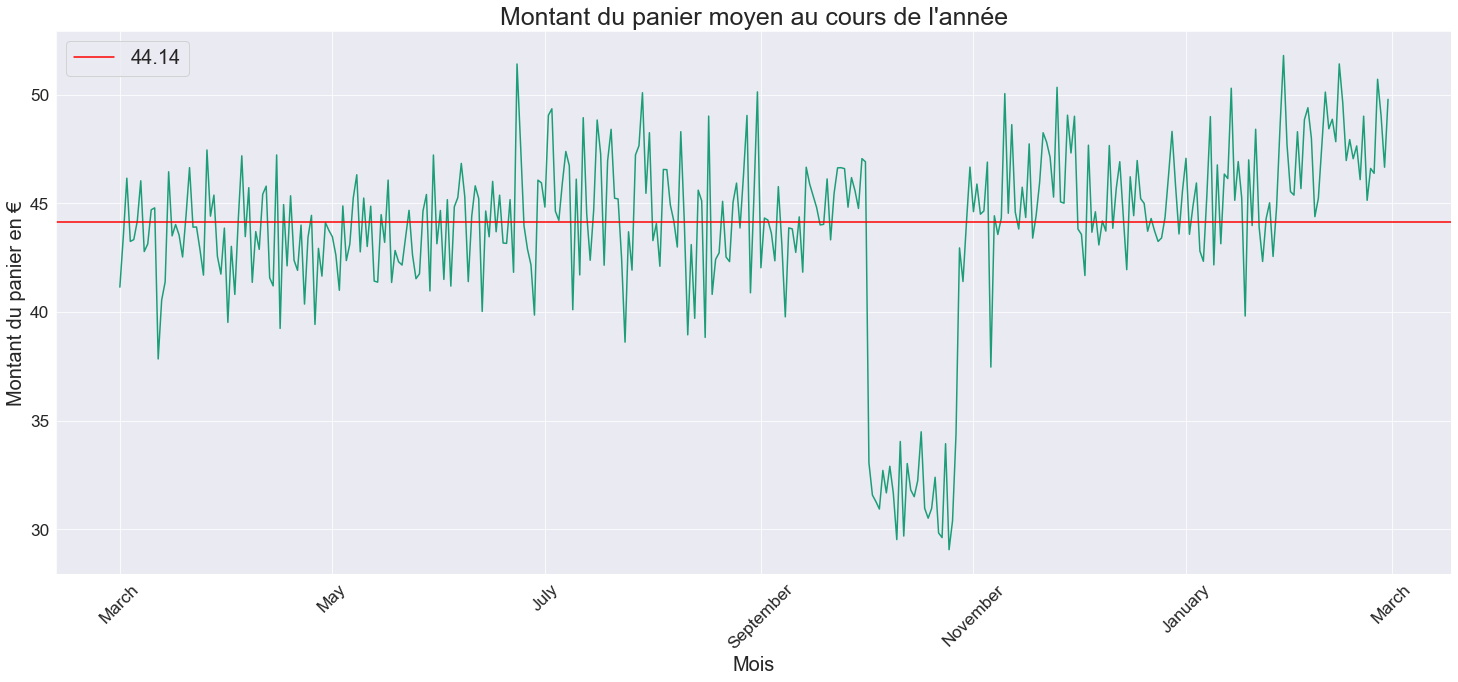

In [18]:
basket_price_date =  pd.DataFrame(overview.groupby(['date']).mean()['basket_price']).reset_index()

plt.figure(figsize = (25,10))
sns.lineplot(x=basket_price_date['date'], y=basket_price_date['basket_price'],data=basket_price_date, sort=False)


dtFmt = mdates.DateFormatter('%B')
plt.gca().xaxis.set_major_formatter(dtFmt)

#ligne de moyenne
mean=round(overview['basket_price'].mean(),2)
plt.axhline(mean, color = 'r', linestyle = '-',label=str(mean))

plt.xticks(rotation=45)
plt.title('Montant du panier moyen au cours de l\'année',fontsize=25)
plt.legend(fontsize=20)
plt.xlabel('Mois',fontsize=20)
plt.ylabel('Montant du panier en €',fontsize=20)

plt.savefig('8 - Montant du panier moyen au cours de l\'année.jpg')

plt.show()

Le panier moyen est de 44€ sur l'ensemble de l'année, nous pouvons donc affirmer que les produits de la catégorie 2 sont peu vendus, sachant que leur prix moyen est de 108€.

### Montant du panier moyen par mois <a id='prix_panier_moyen_mois'></a>

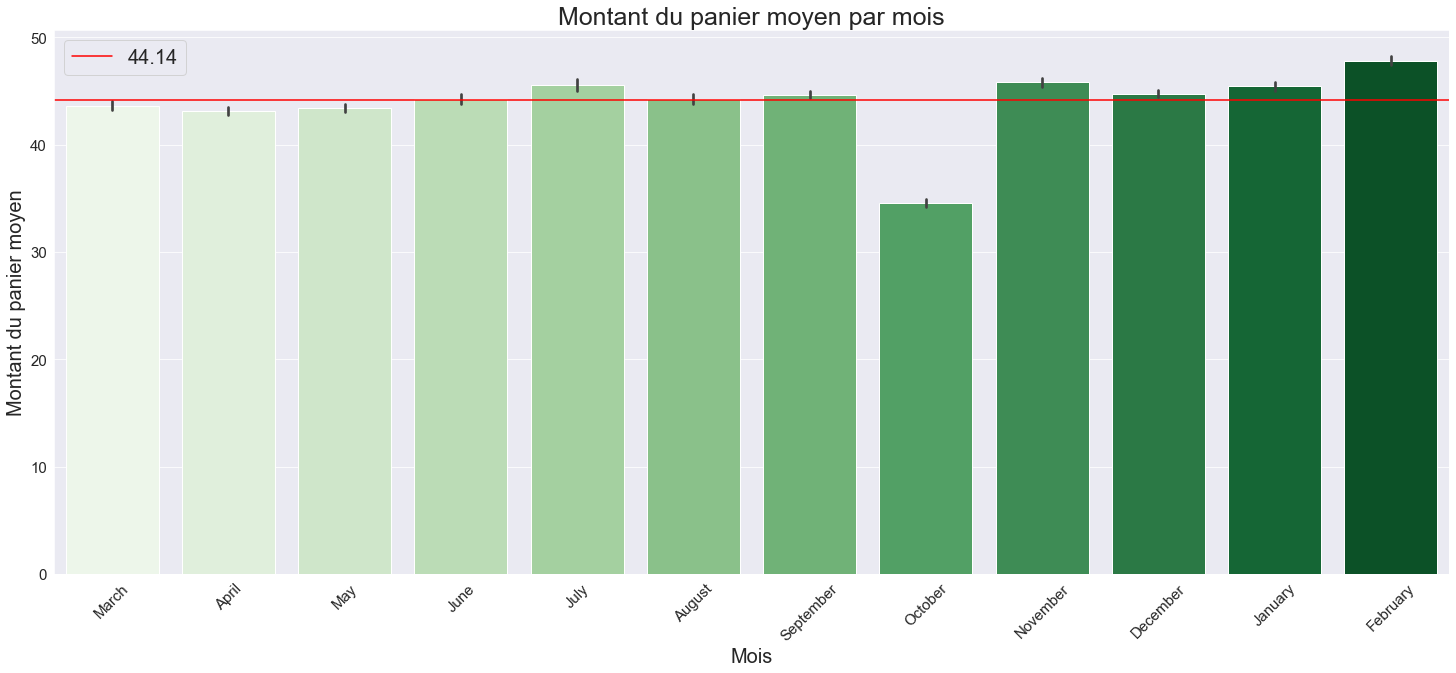

In [19]:
plt.figure(figsize = (25,10))

sns.barplot(x=overview['month_per_year'], y=overview['basket_price'],data=overview, palette='Greens')

plt.title('Montant du panier moyen par mois',fontsize=25)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Mois',fontsize=20)
plt.ylabel('Montant du panier moyen',fontsize=20)

#ligne de moyenne
mean=round(overview['basket_price'].mean(),2)
plt.axhline(mean, color = 'r', linestyle = '-',label=str(mean))

plt.legend(fontsize=20)

plt.savefig('9 - Montant du panier moyen par mois.jpg')


plt.show()

Par mois, le montant du panier moyen est stable et tourne autour de la moyenne de 44€. Nous pouvons donc penser que ce ne sont pas l'achat d'articles plus chers qui dynamisent le chiffre d'affaires mais une augmentation de la taille du panier moyen, donc l'achat de plus d'articles.
Regardons cela de plus près.

### Taille du panier moyen au cours de l'année<a id='taille_panier'></a>

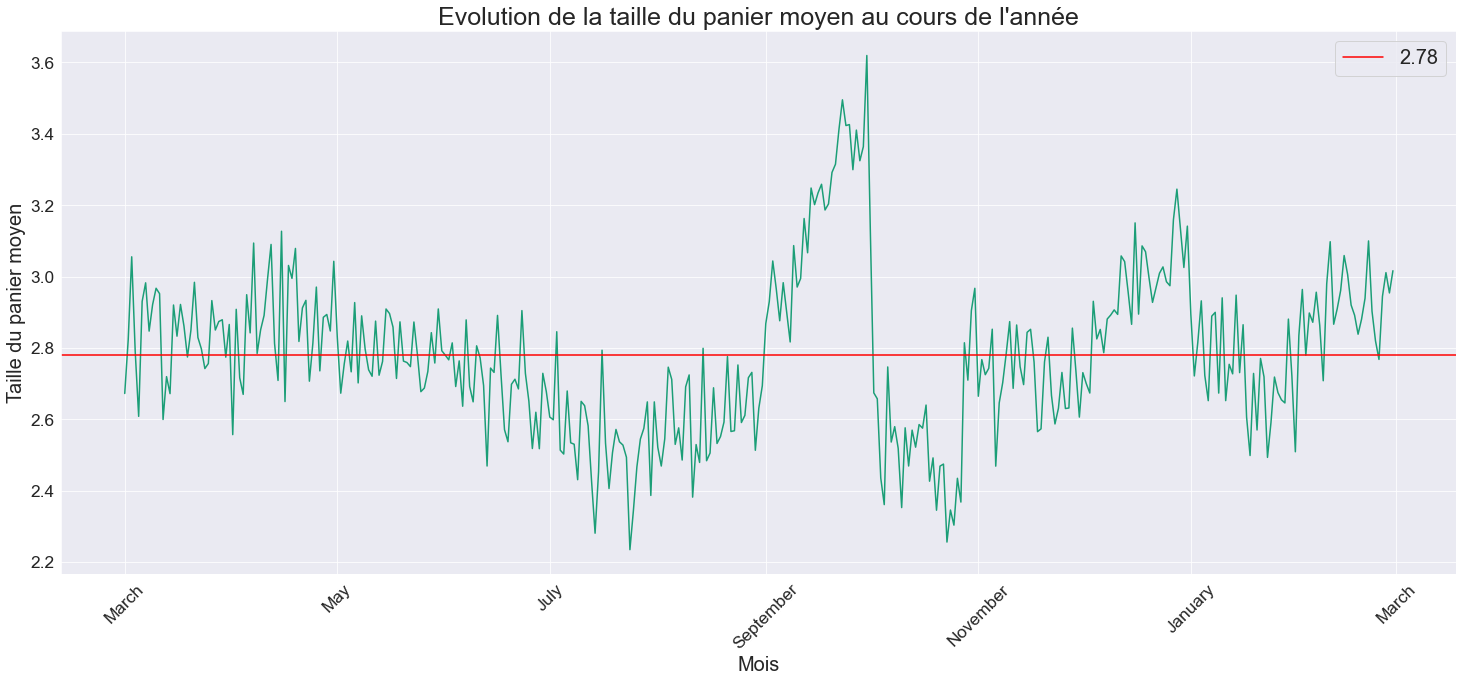

In [20]:
basket_size_date =  pd.DataFrame(overview.groupby(['date']).mean()['basket_size']).reset_index()

plt.figure(figsize = (25,10))
sns.lineplot(x=basket_size_date['date'], y=basket_size_date['basket_size'],data=basket_size_date, sort=False)

#ligne de moyenne
mean=round(basket_size_date['basket_size'].mean(),2)
plt.axhline(mean, color = 'r', linestyle = '-',label=str(mean))

plt.xticks(rotation=45)
dtFmt = mdates.DateFormatter('%B')
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.title('Evolution de la taille du panier moyen au cours de l\'année',fontsize=25)
plt.legend(fontsize=20)
plt.xlabel('Mois',fontsize=20)
plt.ylabel('Taille du panier moyen',fontsize=20)

plt.savefig('10 - Taille du panier moyen au cours de l\'année.jpg')


plt.show()

La taille du panier moyen augmente tout au long du mois de Septembre, et chute brutalement en Octobre ce qui explique également la baisse du chiffre d'affaires à cette période. Nous observons également un pic lors du mois de Décembre, comme constaté lors de l'analyse du chiffre d'affaires. 

Nous pouvons donc déterminer que la hausse du chiffre d'affaires pendant ces périodes n'est pas due à un achat de livres plus chers mais à une augmentation du panier moyen et confirmer notre hypothèse précédente.

### Taille du panier moyen par mois<a id='taille_panier_mois'></a>

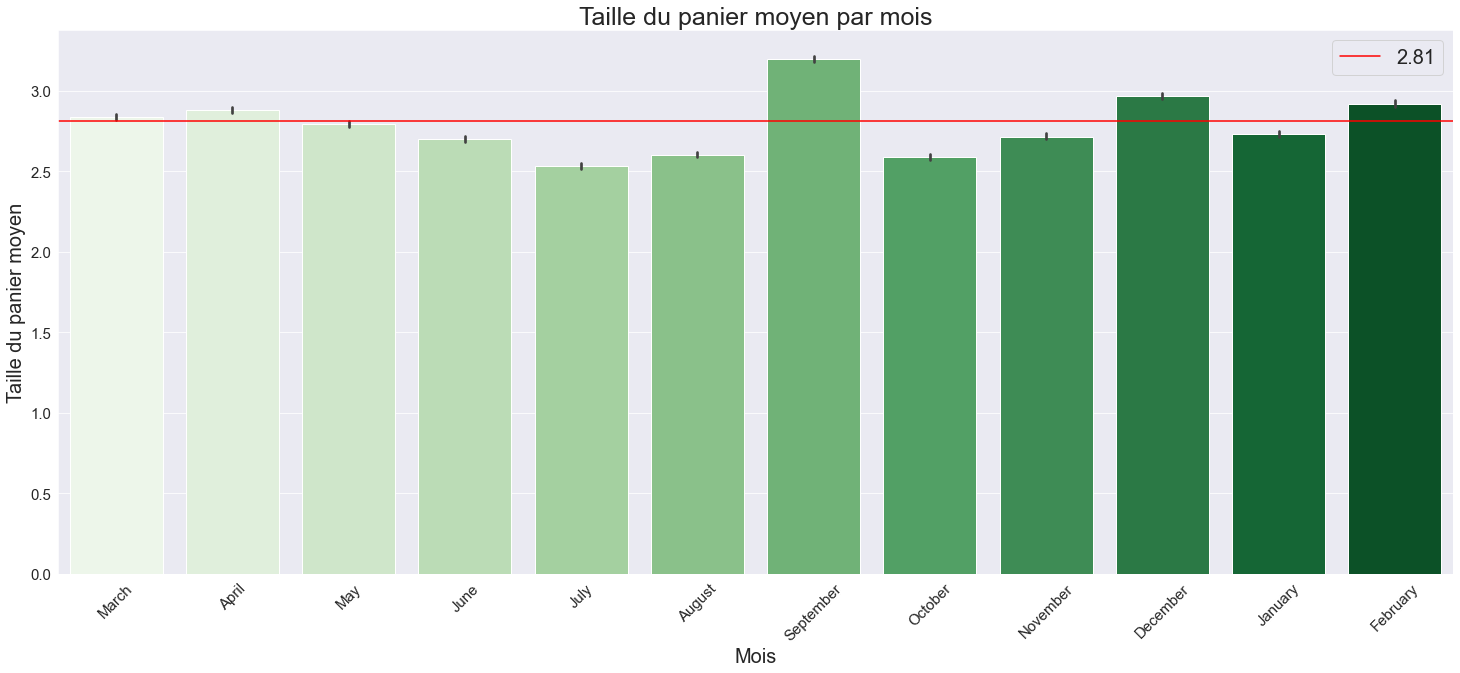

In [21]:
plt.figure(figsize = (25,10))

sns.barplot(x=overview['month_per_year'], y=overview['basket_size'],data=overview, palette='Greens')

plt.title('Taille du panier moyen par mois',fontsize=25)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Mois',fontsize=20)
plt.ylabel('Taille du panier moyen',fontsize=20)

#ligne de moyenne
mean=round(overview['basket_size'].mean(),2)
plt.axhline(mean, color = 'r', linestyle = '-',label=str(mean))

plt.legend(fontsize=20)

plt.savefig('11 - Taille du panier moyen par mois.jpg')


plt.show()

<br/>La ligne de moyenne nous indique une taille de panier moyen de presque 3 articles sur l'année. Ce sont pendant les vacances d'été ainsi qu'en Octobre, Novembre et Janvier que la taille du panier moyen passe sous la ligne de moyenne.

### Fréquence du nombre d'articles achetés<a id='freq_prod'></a>

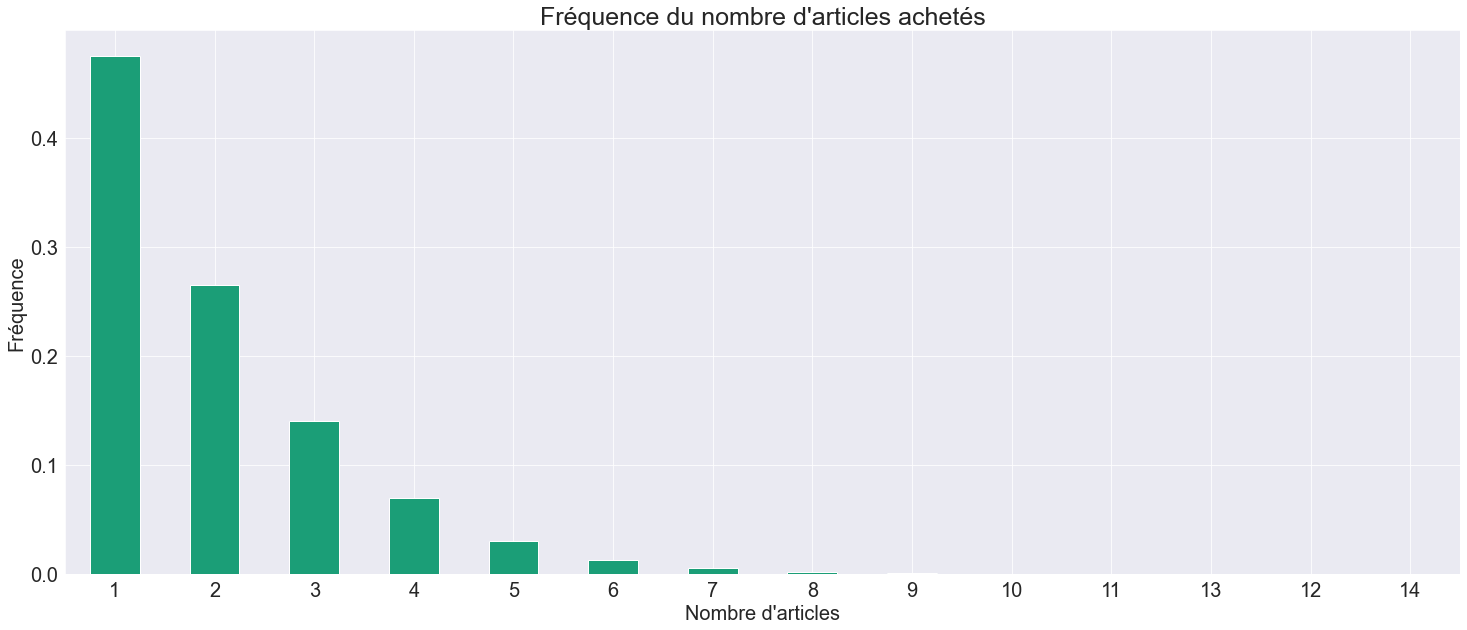

In [22]:
freq_size = pd.DataFrame(overview.groupby(['session_id']).count()['basket_size']).reset_index()

plt.figure(figsize = (25,10))
freq_size['basket_size'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=0,fontsize=20)
plt.title('Fréquence du nombre d\'articles achetés',fontsize=25)
plt.yticks(fontsize=20)
plt.xlabel('Nombre d\'articles',fontsize=20)
plt.ylabel('Fréquence',fontsize=20)

plt.savefig('12 - Fréquence d\'achats.jpg')

plt.show()

Nous constatons que l'achat d'un seul article concernent plus de 50% des sessions d'achat. Plus la taille du panier moyen est grande, moins il y a de sessions d'achat enregistrés.

In [58]:
#Fréquence d'achat moyenne
freq['monthly_freq'].mean()

8.52176399875909

### Etude de la répartition du chiffre d'affaires par client avec la courbe de Lorenz et l'indice de Gini<a id='lorenz'></a>

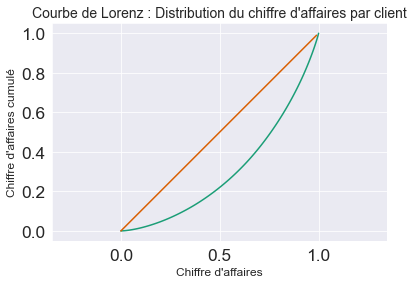

In [65]:
clients=pd.DataFrame(overview.groupby('client_id').sum()['price']).sort_values('price')

dep = clients.price.values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
X = arange(0,1,0.01)
Y=X
plt.xlabel('Chiffre d\'affaires',fontsize=12)
plt.ylabel('Chiffre d\'affaires cumulé',fontsize=12)
plt.title('Courbe de Lorenz : Distribution du chiffre d\'affaires par client',fontsize=14)
plot(X, Y)

plt.savefig('13 - Courbe de Lorenz.jpg')

plt.show()

In [25]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.4397174885499553

L'indice de Gini indique que la répartition du chiffre d'affaires par client est plutôt inégale. En effet, un indice de gini de 0 correspond à une égalité parfaite et un indice de 1 correspond à une inégalité extrême.

## Analyse des clients<a id='clients'></a>

<br/> Nous pouvons directement utiliser le dataframe "customers" qui recensence le sexe et l'année de naissance. Ajoutons l'âge des clients afin de continuer l'analyse.

In [26]:
# Ajout de l'âge des clients
customers['age']=2022-customers.birth
customers

,Unnamed: 0,client_id,sex,birth,age
0,0,c_4410,f,1967,55
1,1,c_7839,f,1975,47
2,2,c_1699,f,1984,38
3,3,c_5961,f,1962,60
4,4,c_5320,m,1943,79
...,...,...,...,...,...
8616,8618,c_7920,m,1956,66
8617,8619,c_7403,f,1970,52
8618,8620,c_5119,m,1974,48
8619,8621,c_5643,f,1968,54


In [27]:
customers.drop(columns=['Unnamed: 0'])

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79
...,...,...,...,...
8616,c_7920,m,1956,66
8617,c_7403,f,1970,52
8618,c_5119,m,1974,48
8619,c_5643,f,1968,54


### Nombre de clients selon leur âge<a id='age'></a>

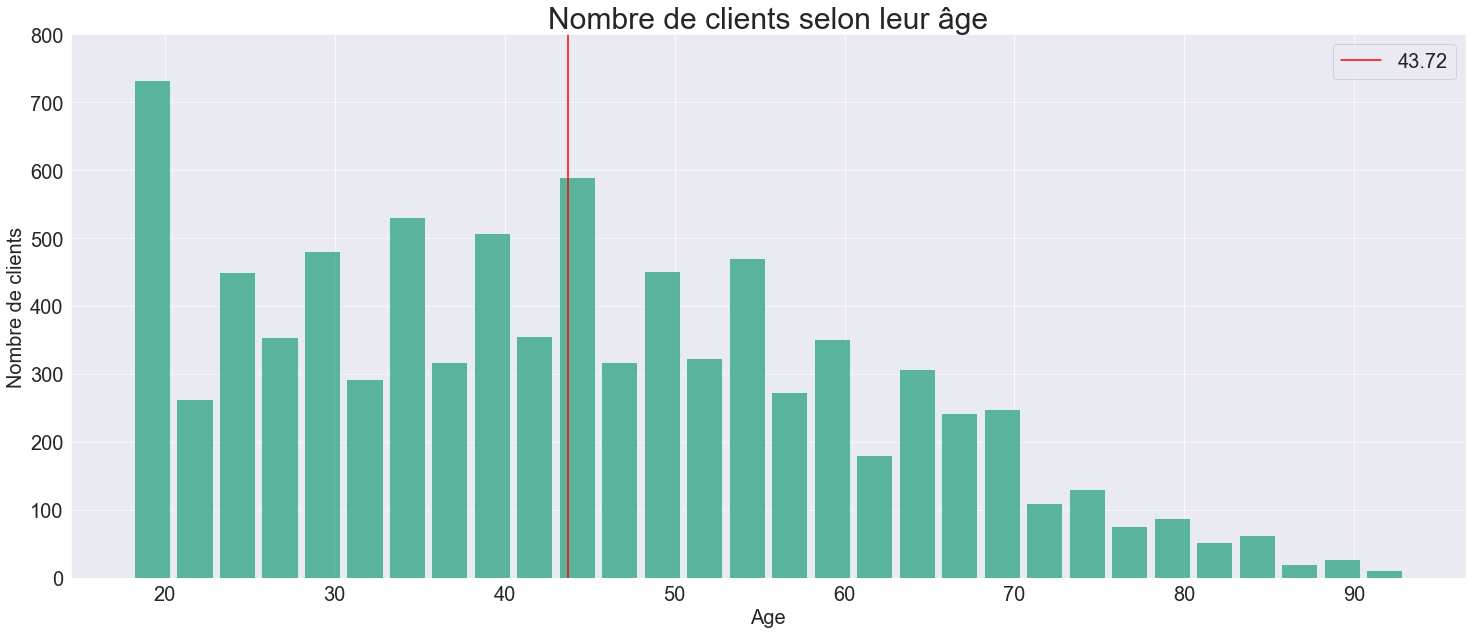

In [28]:
plt.figure(figsize = (25,10))

#ligne de moyenne
mean=round(customers['age'].mean(),2)
plt.axvline(mean, color = 'r', linestyle = '-',label=str(mean))


n, bins, patches = plt.hist(x=customers['age'], bins='auto',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Nombre de clients',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Nombre de clients selon leur âge',fontsize=30)
plt.legend(fontsize=20)
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq/100) * 100 if maxfreq % 100 else maxfreq + 100)

plt.savefig('14 - Nombre de clients selon leur âge.jpg')

<br/> Nous remarquons un nombre important de clients de moins de 20 ans. En moyenne, les clients sont une population plutôt jeune avec un âge moyen d'environ 44 ans.

### Pyramide des âges selon le genre des clients<a id='pyramide'></a>

<Figure size 1440x1800 with 0 Axes>

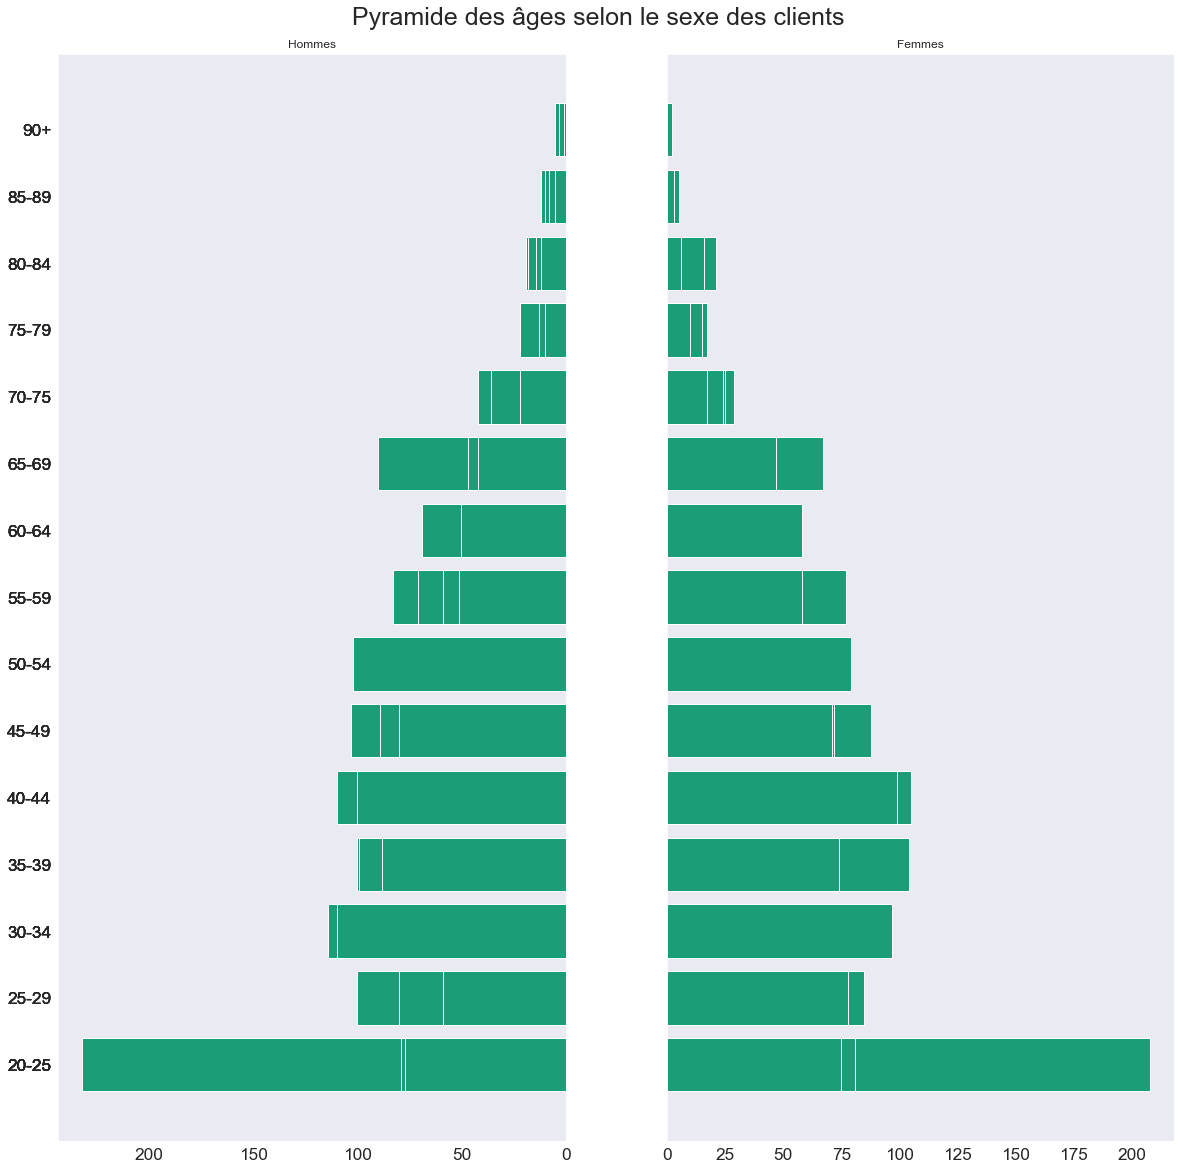

<Figure size 2160x1800 with 0 Axes>

In [70]:
sex_age = customers.pivot_table(index=["age"],columns=["sex"],values=["client_id"],aggfunc='count').reset_index()
sex_age.columns=['age',"m", "f"]
# Afin de créer le graphique, nous pouvons créer des tranches d'âges détaillés
def f(x):
    if (x > 17) and (x <= 25):
        return '20-25'
    elif (x > 24) and (x <= 29 ):
        return '25-29'
    elif (x > 29) and (x <= 34):
        return'30-34'
    elif (x > 34) and (x <= 39) :
        return '35-39'
    elif (x > 39) and (x <= 44):
        return'40-44'
    elif (x > 44) and (x <= 49):
        return'45-49'
    elif (x > 49) and (x <= 54):
        return'50-54'
    elif (x > 54) and (x <= 59):
        return'55-59'
    elif (x > 59) and (x <= 64):
        return'60-64'
    elif (x > 64) and (x <= 69):
        return'65-69'
    elif (x > 69) and (x <= 74):
        return'70-75'
    elif (x > 74) and (x <= 79):
        return'75-79'
    elif (x > 79) and (x <= 84):
        return'80-84'
    elif (x > 84) and (x <= 89):
        return'85-89'
    elif (x >= 89):
        return'90+'
sex_age['age_group'] = sex_age['age'].apply(f)


plt.figure(figsize = (20,25))

#define x and y limits
y = sex_age['age_group']
x_male = sex_age['m']
x_female = sex_age['f']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(20, 20))

#specify background color and plot title
plt.figtext(.5,.9,'Pyramide des âges selon le sexe des clients', fontsize=25, ha='center')
plt.figure(figsize = (30,25))


#define male and female bars
axes[0].barh(y, x_male, align='center')
axes[0].set(title='Hommes')
axes[1].barh(y, x_female, align='center')
axes[1].set(title='Femmes')


#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=sex_age['age_group'])
axes[0].invert_xaxis()
axes[0].grid()

plt.savefig('15 - Pyramide des âges selon le sexe.png')

#display plot
plt.show()

<br/>Nous observons une répartition des âges selon le sexe plutôt homogène. Effectuons maintenant une analyse plus détaillée de ces indicateurs.

### Etude détaillée des âges selon le sexe des clients<a id='detail'></a>

--------------------
f
nb:
 4490
min:
 18
max:
 93
moy:
 44.010244988864144
med:
 43.0
mod:
 0    18
dtype: int64
var:
 292.2319663096896
ect:
 17.09479354393289
skw:
 0.37343592433485473
kur:
 -0.6115815792336186


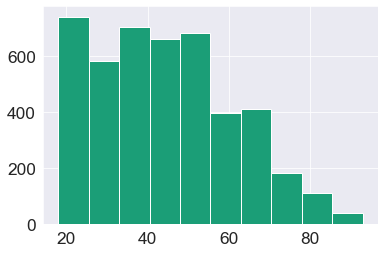

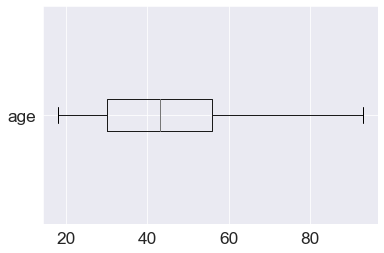

--------------------
m
nb:
 4131
min:
 18
max:
 93
moy:
 43.41370128298233
med:
 42.0
mod:
 0    18
dtype: int64
var:
 279.4253169952508
ect:
 16.71601977132268
skw:
 0.34393753511035213
kur:
 -0.6733482771002892


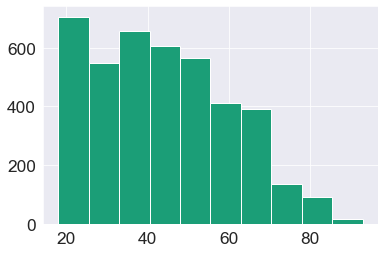

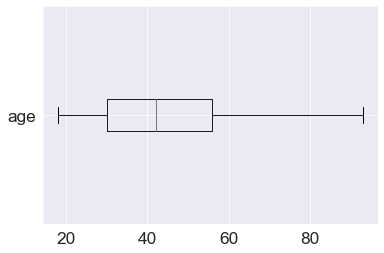

In [30]:
for cat in customers['sex'].unique():
    subset = customers[customers.sex == cat]
    print('-'*20)
    print(cat)
    print('nb:\n',subset['sex'].count())
    print('min:\n',subset['age'].min())
    print('max:\n',subset['age'].max())
    print('moy:\n',subset['age'].mean())
    print('med:\n',subset['age'].median())
    print('mod:\n',subset['age'].mode())
    print('var:\n',subset['age'].var(ddof=0))
    print('ect:\n',subset['age'].std(ddof=0)) #écart de prix avec la moyenne
    #mesure de forme
    print('skw:\n',subset['age'].skew())
    print('kur:\n',subset['age'].kurtosis())
    subset['age'].hist()
    plt.show()
    subset.boxplot(column='age', vert=False)
    plt.show()

<br/>  Nous avons 4 490 femmes et 4131 hommes dans le fichier clients. Le fichier client est donc plûtot homogène en terme de genre. L'âge moyen des femmes est de 44 ans et l'âge moyen des hommes est de 43 ans. Nous observons également un mode (la valeur la plus représentée de la variable âge) à 18 ans. Nous pouvons supposer qu'un certain nombre de clients ayant renseignée 18 ans comme étant leur âge sont en fait plus jeunes car ils n'ont pas l'âge minimum pour s'inscrire.

Nous voyons également que les deux genres ont un coefficient d'applatissement (kurtosis) et de d'asymétrie (skewness) similaires.
Le coefficient d'asymétrie est proche de 0, il s'agit donc d'une distribution plutôt symétrique.
Le coefficient d'applatissement est également proche de 0 mais est négatif, les observations sont moins concentrées.

## Conclusion de l'analyse descriptive<a id='conclusion'></a>

<br/> •  Un chiffre d'affaires annuel stable.
<br/> •  Une importante chute du chiffre d'affaires en Octobre ou l'on a enregistré aucune vente de la catégorie 1.
<br/> •  Les catégories 0 et 1 représentent 80% du chiffre d'affaires global.
<br/> •  La catégorie 2 est la catégorie la plus cher, elle représente 5% des ventes totales mais représente plus de 20% du chiffre d'affaires.
<br/> •  Les périodes de Septembre et de Décembre sont celles qui enregistrent un chiffre d'affaire plus élevé.
<br/> •  Le panier moyen est de 44€ et contient 3 articles envirion.
<br/> •  Il y presque autant d'hommes que de femmes dans le fichier client avec un âge moyen de 44 ans.
<br/> •  Retenons lors de notre analyse de corrélations la possible anomalie liée à des clients ayant renseignés 18 ans comme âge mais étant plus jeunes en réalité.


## Mission n°3 : Corrélations

### Suppresion des outliers<a id='outliers'></a>

Afin de réaliser des tests signficatifs et d'éviter des erreurs dues à des valeurs aberrantes, nous allons supprimer du dataframe les outliers concernant 4 clients qui ont beaucoup dépensés au cours de l'année.

In [31]:
overview_outliers = pd.DataFrame(overview.groupby('client_id').sum()['price']).reset_index()
overview_outliers.sort_values(by='price', inplace=True, ascending=False)
overview_outliers

,client_id,price
677,c_1609,162007.34
4388,c_4958,144257.21
6337,c_6714,73220.80
2724,c_3454,54466.38
7715,c_7959,2564.25
...,...,...
8151,c_8351,6.31
8480,c_890,6.08
750,c_1675,5.57
7889,c_8114,4.99


In [32]:
# Création d'un index afin de récupérer les lignes concernées
indexNames = overview[(overview['client_id'] == 'c_1609') |(overview['client_id'] == 'c_6714')|(overview['client_id'] == 'c_3454')|(overview['client_id'] == 'c_4958')].index
# Suppression des clients du dataframe
overview.drop(indexNames , inplace=True)
overview.sort_values(by = 'price', ascending=False)
overview.drop(columns='Unnamed: 0')

,id_prod,price,categ,session_id,client_id,hour,date,time,sex,birth,nb_sales_clients,age,month_per_year,basket_size,basket_price,sessions_month,age_group
0,0_2007,9.99,0,s_201,c_6906,10.0,2021-03-01,10:06:06.726895,m,1986,125,36,March,3,49.28,28568,31-50
1,0_2096,14.84,0,s_311,c_6823,14.0,2021-03-01,14:54:32.544060,m,1958,37,64,March,2,29.83,28568,51+
2,0_1627,3.99,0,s_72,c_6823,2.0,2021-03-01,02:58:10.580555,m,1958,37,64,March,1,3.99,28568,51+
3,2_108,63.36,2,s_314,c_5042,15.0,2021-03-01,15:03:55.782366,m,1995,28,27,March,1,63.36,28568,18-30
4,1_446,23.92,1,s_109,c_5890,4.0,2021-03-01,04:34:54.577506,m,1957,41,65,March,1,23.92,28568,51+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336811,0_1152,10.70,0,s_172145,c_332,10.0,2022-02-28,10:31:46.010138,f,1973,147,49,February,5,40.04,29567,31-50
336812,0_2134,5.57,0,s_171999,c_903,3.0,2022-02-28,03:26:03.374741,f,1963,23,59,February,1,5.57,29567,51+
336813,0_2293,4.99,0,s_171940,c_2048,1.0,2022-02-28,01:05:47.900681,m,1987,84,35,February,7,74.01,29567,31-50
336814,0_1140,3.73,0,s_171986,c_8547,2.0,2022-02-28,02:43:12.724027,f,1977,63,45,February,1,3.73,29567,31-50


## Corrélation entre le sexe des clients et les catégories de produits achetés

### Tableau de contingence<a id='cont1'></a>

In [33]:
c=overview[['categ', 'sex']].pivot_table(index='categ',
                              columns='sex',
                              aggfunc=len)

cont =  c.copy()

tx = overview['categ'].value_counts()
ty = overview['sex'].value_counts()

cont.loc[:, 'Total'] = tx
cont.loc['total', :] = ty
cont.loc['total', 'Total'] = len(overview)
cont

sex,f,m,Total
categ,,,
0,101206.0,94064.0,195270.0
1,53774.0,48851.0,102625.0
2,8122.0,7634.0,15756.0
total,163102.0,150549.0,313651.0


### Tableau de contigence avec effectifs théoriques<a id='cont_eff1'></a>

In [34]:
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)

tx.columns=['foo']
ty.columns=['foo']

n = len(overview)
indep =  tx.dot(ty.T)/n

indep.sort_index(axis=1, inplace=True)
indep.sort_index(inplace=True)

indep

,f,m
0,101542.566547,93727.433453
1,53366.138638,49258.861362
2,8193.294815,7562.705185


### Calcul du chi-2<a id='chi2_1'></a>

In [35]:
mesure = (c-indep)**2/indep
xi_n = mesure.sum().sum()
ddl = (len(c)-1)*(len(c.columns)-1)
pvalue = st.chi2_contingency(c)[1]

print('Degré de liberté:', ddl)
print('Chi-2:', xi_n)
print('p_value:', round(pvalue, 20))
# plus le chi2 est important, moins il y a de chance que ce soit indépendant
# nous pouvons déterminer un seuil de signification à 5%
# chi2 supérieur au chi2 seuil (5,99)
# 0,6% de se tromper et p value inférieur à 5%

Degré de liberté: 2
Chi-2: 10.110865513726571
p_value: 0.006374607510181767


<br/> Avec un degré de liberté de 2, le chi-2 est supérieur au chi-2 seuil et la p-value est inférieure à 0,05, le modèle est donc significatif et nous pouvons rejeter l'hypothèse nulle de non dépendance. En effet, plus la valeur de p est petite, plus la probabilité de faire une erreur en rejetant l'hypothèse nulle est faible. Il y a donc corrélation entre le sexe des clients et la catégories des produits. Réalisons un tableau de contigence coloré afin de déterminer les corrélations entre le sexe et chacune des catégories.

<img src="Chi-square-table.jpg" width=500 height=500 />


### Tableau de contingence coloré<a id='cont_color1'></a>

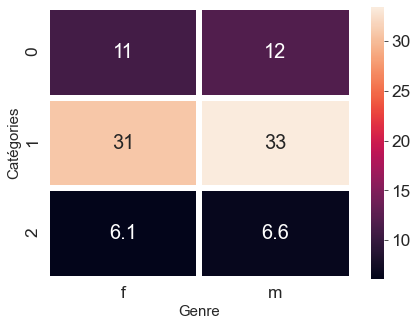

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(121)


sns.heatmap((mesure/xi_n)*100,annot=True, cbar=True, linewidths=5, annot_kws={'size': 20})

plt.ylabel('Catégories', fontsize=15)
plt.xlabel('Genre', fontsize=15)

plt.savefig('16 - Tableau de contingence coloré_Catégorie_Sexe.jpg')

plt.show()
#plus la valeur s'approche de 100, plus il y a corrélation

<br/> Nous pouvons donc conclure ici :
<br/>Il y a effectivement une corrélation entre la catégorie et le sexe, surtout pour la catégorie 1 où la corrélation est plus forte. 
Cependant, cette corrélation est peu exploitable commercialement car elle ne peut être reliée à un sexe en particulier, le pourcentage de différence étant trop faible.

Etablir des stratégies et actions marketing basées sur le genre des clients pourraient potentiellement créer des dépenses inutiles.

## Corrélation entre l'âge des clients et le montant total des achats

### Diagramme de dispersion<a id='disper1'></a>

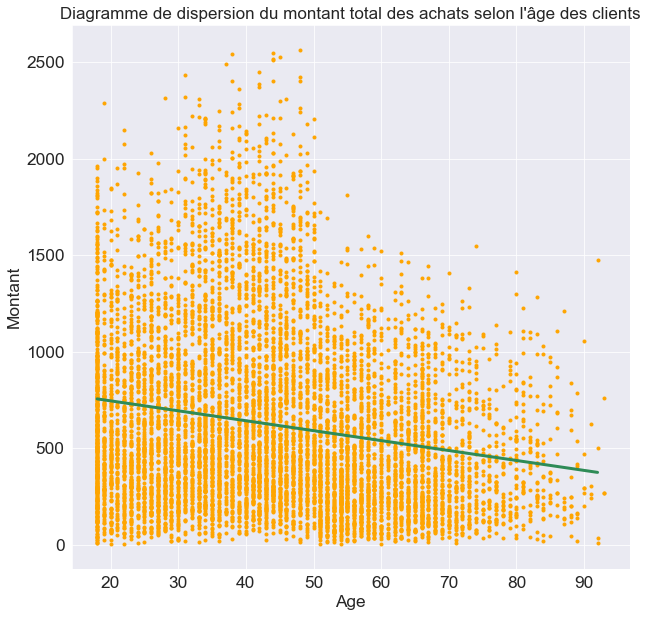

In [37]:
df_age = overview
df_age = df_age.groupby(by=['client_id', 'age']).sum()
df_age = df_age.reset_index()

Y = df_age['price']
X = df_age[['age']]
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a,b = result.params['age'],result.params['intercept']

X = df_age['age']
Y = df_age['price']
fenetre=np.arange(min(X), max(X))

plt.figure(figsize=(10, 10))
plt.plot(X, Y,  '.', color='orange')
plt.plot(fenetre, [a*x+b for x in fenetre], color='seagreen', linewidth=3)
plt.title('Diagramme de dispersion du montant total des achats selon l\'âge des clients', fontsize=17)
plt.xlabel('Age')
plt.ylabel('Montant')

plt.savefig('17 - Diagramme de dispersion du montant total des achats selon l\'âge des clients.jpg')

plt.show()

<br/> La droite ici montre qu'il y aurait une corrélation négative entre l'âge et le montant des achats. Plus un client est âgé, moins il dépense. Cependant, cette droite n'est pas en accord avec le nuage de points qui établit une autre conclusion. La dispersion des points montre que ce sont les 31-50 ans qui dépensent davantage et non les plus jeunes. 

Etudions le coefficient de Pearson et analysons la qualité du modèle afin de déterminer s'il y véritablement une corrélation entre les deux variables.

### Calcul du coefficient de Pearson et du R²<a id='coef1'></a>

In [38]:
#coefficient de corrélation de pearson
print('Coefficient de Pearson :', st.pearsonr(X, Y)[0])

#analyse de la qualité du modèle
print('R² : ', (st.pearsonr(X,Y)[0])**2)
#le R au carré explique dans quelle mesure la variance d’une variable explique la variance de la seconde variable.

Coefficient de Pearson : -0.19036086938234426
R² :  0.036237260592001934


<br/> Le coefficient de Pearson étant proche de 0, on peut estimer qu'il n'y a pas de corrélation entre l'âge et le montant des achats. Autrement dit, connaître la valeur du x d'un point ne nous donne aucune indication sur la valeur de y. De plus, le coefficient de détermination est également proche de 0, l'équation de la droite de régression ne détermine seulement qu'environ 4% de la distribution des points. On ne peut pas établir de corrélation entre l'âge et le montant des achats.

Il est donc impossible d'établir de conclusion au vu des résultats obtenus qui diffèrent fortement.

Transformons l'âge en variable qualitative afin d'effectuer plus d'analyses.

## Corrélation entre la tranche d'âge des clients et le montant total des achats

In [39]:
# Création d'un dataframe regroupant le montant total des achats par clients
df_age_group = overview.groupby(by=['client_id','age_group']).sum()
df_age_group = df_age_group.dropna().reset_index()

df_age_group

,client_id,age_group,Unnamed: 0,price,categ,hour,birth,nb_sales_clients,age,basket_size,basket_price,sessions_month
0,c_1,51+,3986306,300.65,6,293.0,39100,400,1340,42,715.42,564196
1,c_10,51+,4011486,586.18,19,327.0,54768,784,1848,70,1360.18,815920
2,c_100,18-30,693053,222.87,5,66.0,11952,36,180,14,486.11,158910
3,c_1000,51+,10171588,980.02,36,669.0,110096,3136,3136,110,1958.82,1609284
4,c_1001,31-50,11241489,1102.45,16,800.0,114956,3364,2320,188,4359.66,1695882
...,...,...,...,...,...,...,...,...,...,...,...,...
8591,c_995,51+,919576,119.08,3,79.0,15640,64,536,14,198.18,213852
8592,c_996,51+,5912204,739.60,25,531.0,82740,1764,2184,54,960.70,1192520
8593,c_997,18-30,4175954,572.89,19,175.0,45862,529,644,69,1402.37,673696
8594,c_998,18-30,4921546,1527.69,36,299.0,56028,784,588,116,3705.35,832544


### Boite à moustaches<a id='boxplot1'></a>

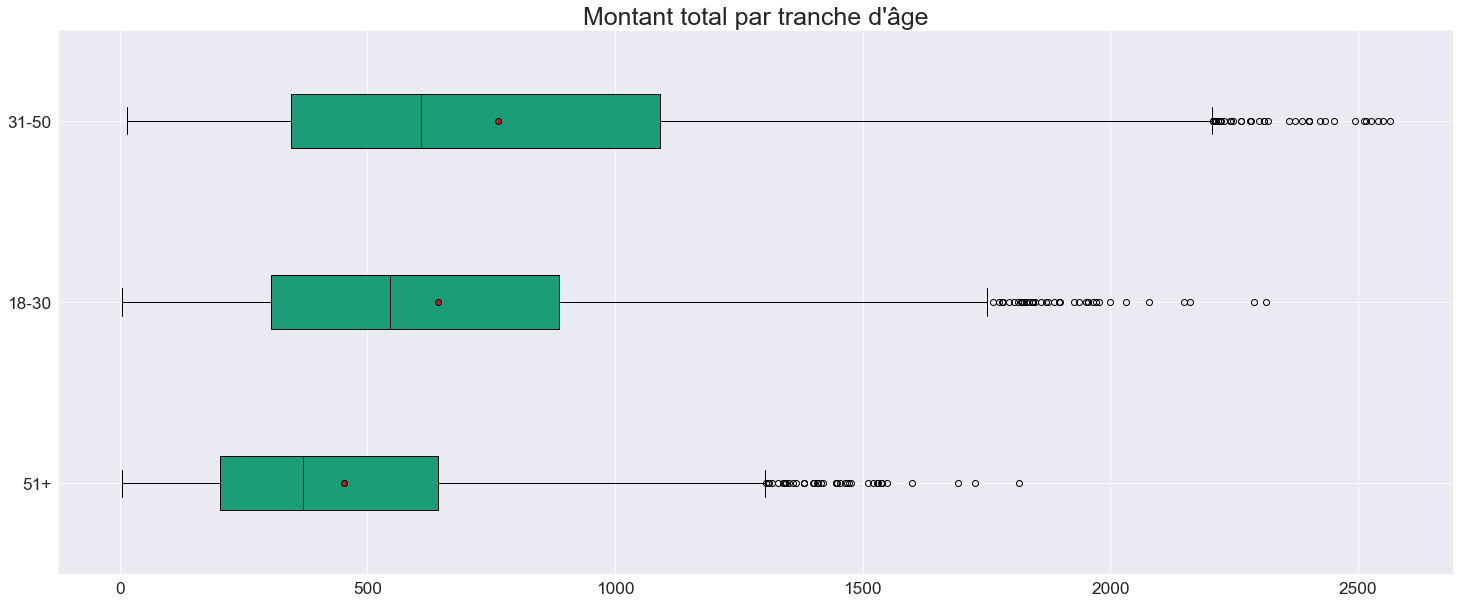

In [40]:
plt.figure(figsize = (25,10))

X = 'age_group' # qualitative
Y = 'price' # quantitative

modalites = df_age_group[X].unique()
groupes = []
for m in modalites:
    groupes.append(df_age_group[df_age_group[X]==m][Y])

# Propriétés graphiques   
medianprops = {'color':'black'}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.title('Montant total par tranche d\'âge',fontsize=25)    
plt.boxplot(groupes, labels=modalites, showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.savefig('18 - Montant total par tranche d\'âge.jpg')


plt.show()

### Calcul de l'éta carré (rapport de corrélation)<a id='eta1'></a>

In [41]:
X = df_age_group['age_group'] # qualitative
Y = df_age_group['price']

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('eta-carré :', eta_squared(X,Y))

eta-carré : 0.08536348781271404


<br/> L'éta carré montre ici une très légère corrélation entre les variables analysées. D'après les boites à moustaches, la tranche des 31-50 ans a tendance à plus dépenser mais la boîte à moustache étant plus étirée, le montant des achats varie donc selon les clients au sein de cette même population. D'un point de vue commerciale, les analyses ne permettent pas d'affirmer qu'il y a une corrélation réelle entre les variables, l'eta carré est trop proche de 0 pour adapter sa stratégie marketing et l'algorithme de recommandation selon la tranche d'âge des clients.

## Corrélation entre l'âge des clients et la fréquence d'achat 

In [59]:
# Création d'un dataframe regroupant la fréquence d'achat moyenne par client
freq = overview.pivot_table(index=['client_id', 'age', 'age_group'],
                          columns=['month_per_year'],
                          values=['basket_size'],
                          aggfunc=sum)
freq=freq.fillna(0)
freq['monthly_freq']=freq.mean(axis=1)
freq=freq.reset_index()

freq.columns=['client_id', 'age', 'age_group',
                'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12',
               'monthly_freq']

freq.drop(columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12'], inplace=True)
freq.head(10)

,client_id,age,age_group,monthly_freq
0,c_1,67,51+,3.500000
1,c_10,66,51+,5.833333
2,c_100,30,18-30,1.166667
3,c_1000,56,51+,9.166667
4,c_1001,40,31-50,15.666667
5,c_1002,40,31-50,6.166667
6,c_1003,40,31-50,12.916667
7,c_1004,49,31-50,7.916667
8,c_1005,81,51+,10.000000
9,c_1006,43,31-50,35.750000


### Diagramme de dispersion<a id='disper2'></a>

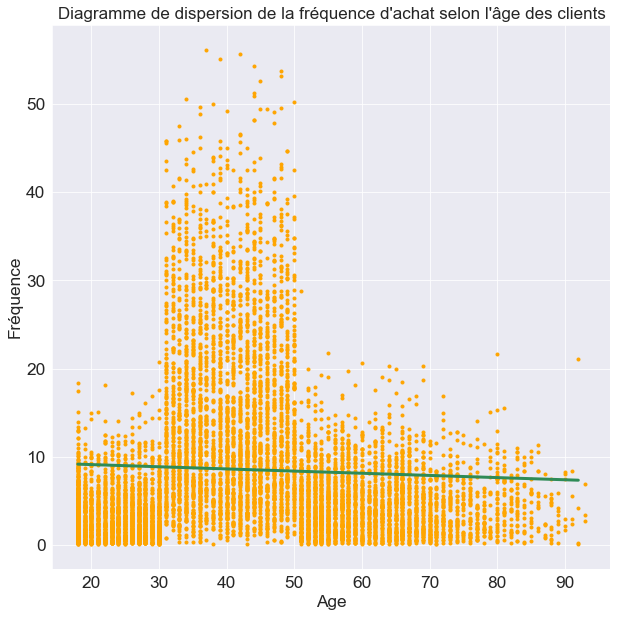

In [43]:
X=freq[['age']]
Y=freq['monthly_freq']

X = X.assign(intercept = [1]*len(X))
lr = sm.OLS(Y, X).fit()
a = lr.params['age']
b = lr.params['intercept']

X = freq['age']
fenetre=np.arange(min(X), max(X))

plt.figure(figsize=(10, 10))
plt.plot(X, Y,  '.', color='orange')
plt.plot(fenetre, [a*x+b for x in fenetre], color='seagreen', linewidth=3)
plt.title('Diagramme de dispersion de la fréquence d\'achat selon l\'âge des clients',fontsize=17)
plt.xlabel('Age')
plt.ylabel('Fréquence')

plt.savefig('19 - Diagramme de dispersion de la fréquence d\'achat selon l\'âge des clients.jpg')

plt.show()

### Calcul du coefficient de Pearson et R²<a id='coef2'></a>

In [44]:
x=freq['age']
y=freq['monthly_freq']

print('Coefficient de Pearson :', st.pearsonr(x, y)[0])
print('R² : ', (st.pearsonr(x, y)[0])**2)

Coefficient de Pearson : -0.046683185379679096
R² :  0.0021793197971934843


<br/>Nous nous retrouvons dans la même situation que précedemment. En effet, le nuage de points indique que les 31-50 ans ont tendance à effectuer davantage d'achats au cours de l'année étudiée alors que la droite de régression montre que plus le client est âgé, plus sa fréquence d'achat est faible. La droite de régression indique donc une corrélation négative. 


Cependant, le coefficient de détermination R² est très faible ce qui signifie que les points sont très éloignés de la droite de régression et donc qui fausse la conclusion établit par la droite de régression. De plus le coefficient de Pearson est proche de 0.

Il est donc impossible d'établir de conclusion au vu des résultats obtenus qui diffèrent fortement.

Transformons alors les âges en tranche d'âge et recommencons l'analyse.

### Boîte à moustaches<a id='boxplot2'></a>

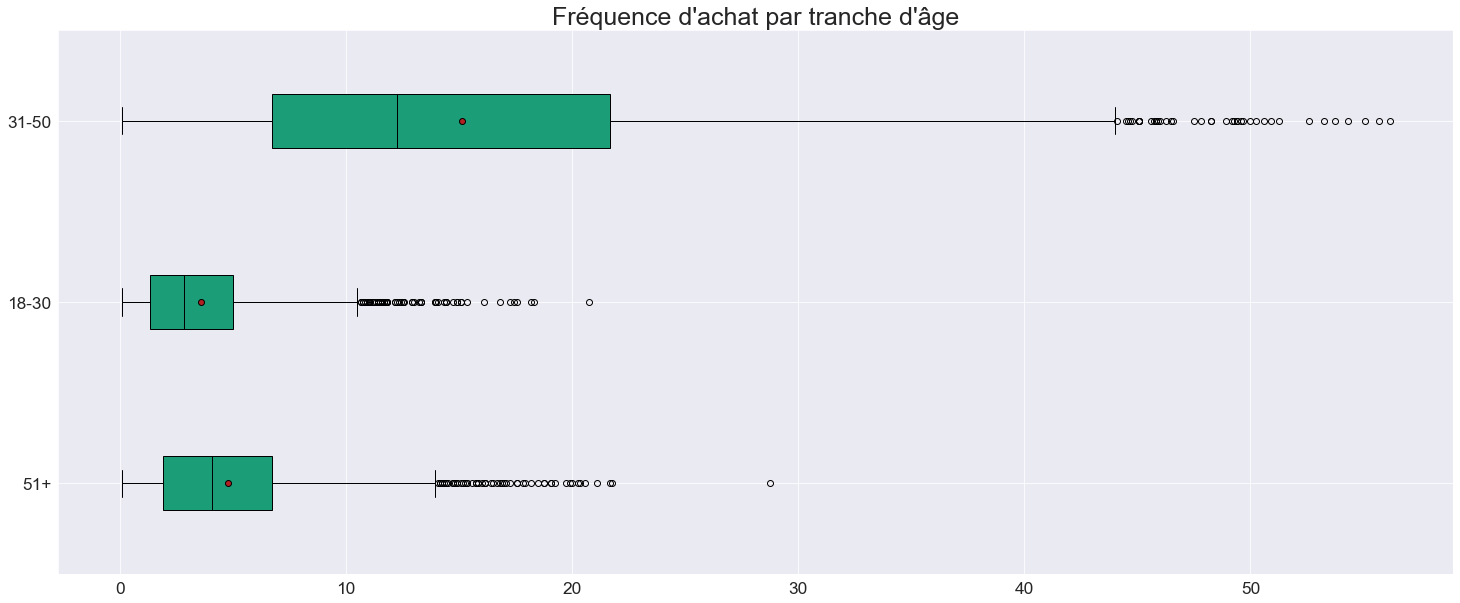

In [45]:
plt.figure(figsize = (25,10))

X = 'age_group' # qualitative
Y = 'monthly_freq' # quantitative

modalites = freq[X].unique()
groupes = []
for m in modalites:
    groupes.append(freq[freq[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.title('Fréquence d\'achat par tranche d\'âge',fontsize=25)
plt.boxplot(groupes, labels=modalites, showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.savefig('20 - Fréquence d\'achat par tranche d\'âge.jpg')

plt.show()

### Calcul de l'éta carré (rapport de corrélation)<a id='eta2'></a>

In [46]:
X = 'age_group' # qualitative
Y = 'monthly_freq' # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

eta_squared(freq[X],freq[Y])
#corrélation

0.35680551676351946

L'éta carré donne raison au nuage de points, il y a bien une corrélation entre les deux variables. 
Nous remarquons que les 18-30 ans et que les plus de 51 ans ont un comportement d'achat assez similaire.
Les 31-50 ans se distinguent avec une fréquence d'achat plus élevée et surtout très hétérogène. Les clients des deux autres tranches d'âge ont un comportement assez similaire, les médianes des boxplots sont aussi rapprochées.

## Corrélation entre l'âge des clients et la taille du panier moyen 

In [47]:
basket = pd.DataFrame(overview.groupby(['client_id', 'age', 'age_group']).mean()['basket_size']).reset_index()
basket.rename(columns={'basket_size': 'average_basket'}, inplace=True)
basket['panier_moyen']=basket['average_basket'].round(2)
basket

,client_id,age,age_group,average_basket,panier_moyen
0,c_1,67,51+,2.100000,2.10
1,c_10,66,51+,2.500000,2.50
2,c_100,30,18-30,2.333333,2.33
3,c_1000,56,51+,1.964286,1.96
4,c_1001,40,31-50,3.241379,3.24
...,...,...,...,...,...
8591,c_995,67,51+,1.750000,1.75
8592,c_996,52,51+,1.285714,1.29
8593,c_997,28,18-30,3.000000,3.00
8594,c_998,21,18-30,4.142857,4.14


### Diagramme de dispersion<a id='disper3'></a>

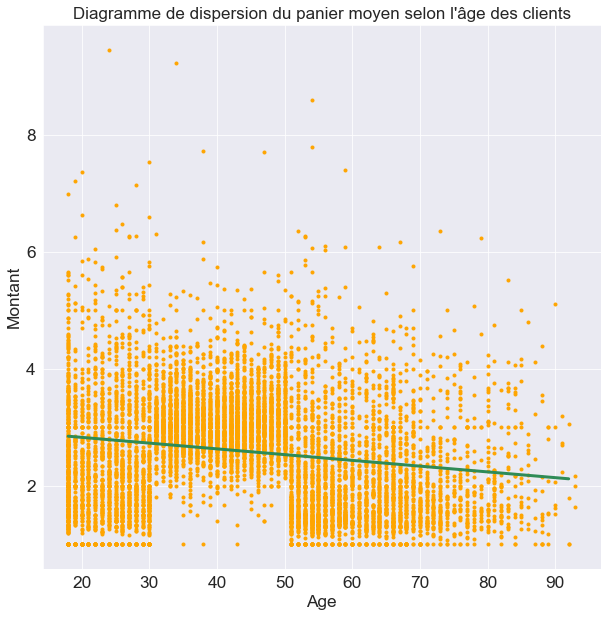

In [48]:
X=basket[['age']]
Y=basket['average_basket']
X = X.assign(intercept = [1]*len(X))
lr = sm.OLS(Y, X).fit()
a = lr.params['age']
b = lr.params['intercept']

X = basket['age']
fenetre=np.arange(min(X), max(X))

plt.figure(figsize=(10, 10))
plt.plot(X, Y,  ".", color='orange')
plt.plot(fenetre, [a*x+b for x in fenetre], color='seagreen', linewidth=3)
plt.title('Diagramme de dispersion du panier moyen selon l\'âge des clients',fontsize=17)
plt.xlabel('Age')
plt.ylabel('Montant')

plt.savefig('21 - Diagramme de dispersion du panier moyen selon l\'âge des clients.jpg')

plt.show()

### Calcul du coefficient de Pearson et du R²<a id='coef3'></a>

In [49]:
x=basket['age']
y=basket['average_basket']

print('Coefficient de Pearson :', st.pearsonr(x, y)[0])
#analyse de la qualité du modèle
print('R² : ', (st.pearsonr(x, y)[0])**2)

Coefficient de Pearson : -0.17289831651331555
R² :  0.029893827853138644


Ici, la droite de régression a la même pente que lors de nos précédentes analyses : elle indique une corrélation négative mais faible entre l'âge et le taille du panier moyen. Autrement dit, plus un client est âgé, moins la taille de son panier moyen sera importante.
Cependant, nous observons également que la tranche des 31-50 ans se distingue encore une fois, la taille minimale du panier moyen est plus élevé que pour les autres tranches d'âge avec une forte concentration autour de la moyenne que nous avons estimé précedemment comme étant de 3 articles. Le nuage de points contredit donc la droite de régression.

Les indicateurs quant à eux n'indiquent aucune corrélation entre les variables: le coefficient de détermination R² et le coefficient de Pearson sont proche de 0. D'après le R², l'équation de la droite de régression détermine seulement 3% de la distribution des points ce qui signifie que la variable x a très peu d'effet sur la variable y. 

Il est donc impossible d'établir de conclusion au vu des résultats obtenus qui diffèrent fortement.

Nous pouvons suivre le même schéma que précedemment et analyser les tranches d'âge.

## Corrélation entre les tranches d'âge des clients et la taille du panier moyen 

### Boîte à moustaches<a id='boxplot3'></a>

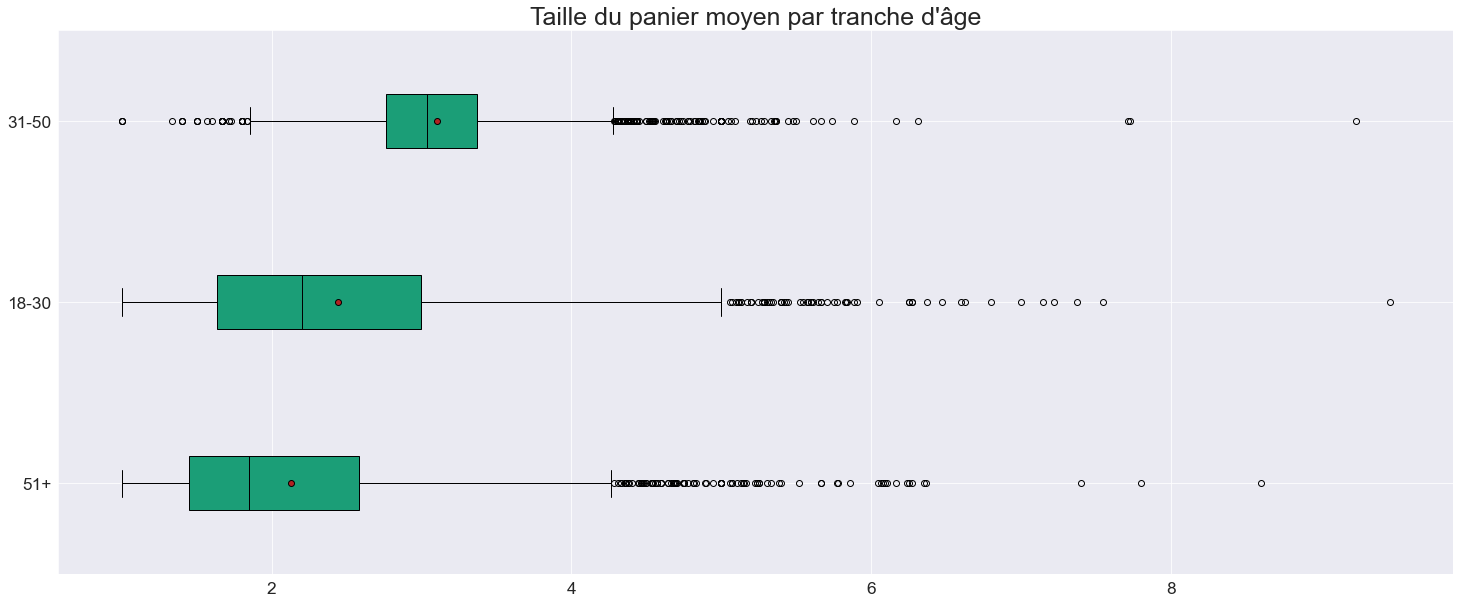

In [50]:
plt.figure(figsize = (25,10))

X = 'age_group' # qualitative
Y = 'average_basket' # quantitative

modalites = basket[X].unique()
groupes = []
for m in modalites:
    groupes.append(basket[basket[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.title('Taille du panier moyen par tranche d\'âge',fontsize=25)
plt.boxplot(groupes, labels=modalites, showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.savefig('22 -Taille du panier moyen par tranche d\'âge.jpg')

plt.show()

### Calcul de l'éta carré (rapport de corrélation)<a id='eta3'></a>

In [51]:
X = 'age_group' # qualitative
Y = 'average_basket' # quantitative

sous_echantillon = basket[basket['average_basket'] > 0] # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.1965518540021807

L'éta carré indique qu'il y a une corrélation moyenne entre les variables étudiées. La boîte à moustache des 31-50 ans est très concentrée, les clients au sein de cette tranche ont donc un panier moyen assez similaire. Ces clients ont également une tendance à avoir un panier moyen contenant plus d'articles.

## Corrélation entre l'âge des clients et les catégories de produits achetés

### Boîte à moustaches<a id='boxplot4'></a>

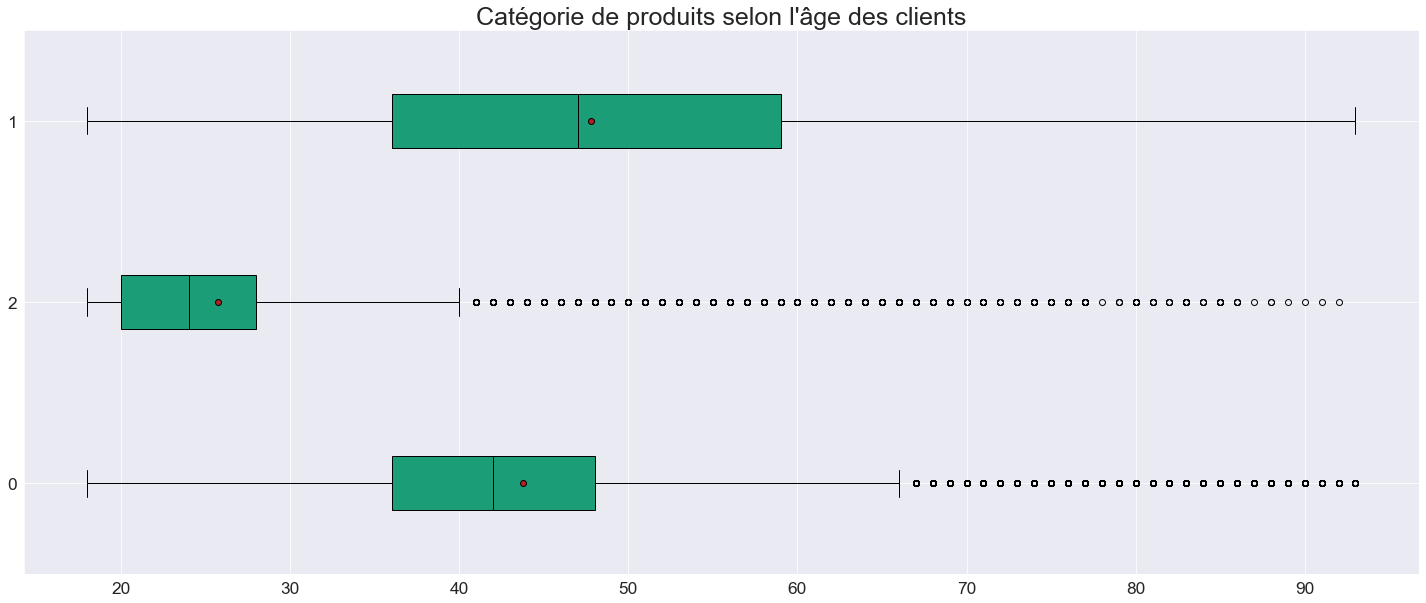

In [52]:
plt.figure(figsize = (25,10))

X = 'categ' # qualitative
Y = 'age' # quantitative

modalites = overview[X].unique()
groupes = []
for m in modalites:
    groupes.append(overview[overview[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.title('Catégorie de produits selon l\'âge des clients',fontsize=25)
plt.boxplot(groupes, labels=modalites, showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.savefig('23 - Catégorie de produits selon l\'âge.jpg')

plt.show()

### Calcul de l'éta carré (rapport de corrélation)<a id='eta4'></a>

In [53]:
X = 'categ' # qualitative
Y = 'age' # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(overview[X],overview[Y])

0.11279029932309785

L'eta carré indique ici une corrélation entre l'âge et les catégories de produits. D'après les boîtes à moustache, la catégorie 1 et 0 s'adressent à tout type de clients sans disctinction d'âge.
La catégorie 2 intéresse davantage un type de client plus jeune. Il serait intéressant pour l'entreprise de "pousser" ces produits à une population plus jeune grâce à l'algorithme de recommandation. De plus, nous savons qu'il s'agit de la catégorie de produit la plus cher, cela pourrait permettre de faire croître le chiffre d'affaires.

## Corrélation entre l'âge des clients et les catégories de produits achetés

### Tableau de contingence<a id='cont2'></a>

In [54]:
c=overview[['categ', 'age_group']].pivot_table(index='categ',
                              columns='age_group',
                              aggfunc=len)

cont =  c.copy()

tx = overview['categ'].value_counts()
ty = overview['age_group'].value_counts()

cont.loc[:, 'Total'] = tx
cont.loc['total', :] = ty
cont.loc['total', 'Total'] = len(overview)
cont

age_group,18-30,31-50,51+,Total
categ,,,,
0,8349.0,150974.0,35947.0,195270.0
1,13532.0,44877.0,44216.0,102625.0
2,14487.0,574.0,695.0,15756.0
total,36368.0,196425.0,80858.0,313651.0


### Tableau de contigence avec effectifs théoriques<a id='cont_eff2'></a>

In [55]:
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)

tx.columns=['foo']
ty.columns=['foo']

n = len(overview)
indep =  tx.dot(ty.T)/n

indep.sort_index(axis=1, inplace=True)
indep.sort_index(inplace=True)

indep

,18-30,31-50,51+
0,22641.660189,122288.498203,50339.841607
1,11899.423244,64269.253486,26456.323270
2,1826.916567,9867.248311,4061.835122


### Calcul du chi-2<a id='chi2_2'></a>

In [56]:
mesure = (c-indep)**2/indep
xi_n = mesure.sum().sum()
ddl = (len(c)-1)*(len(c.columns)-1)
pvalue = st.chi2_contingency(c)[1]

print('Degré de liberté :', ddl)
print('p_value :', round(pvalue, 20))
print('Chi-2 :', xi_n)

Degré de liberté : 4
p_value : 0.0
Chi-2 : 137137.97556981342


### Tableau de contingence coloré<a id='cont_color2'></a>

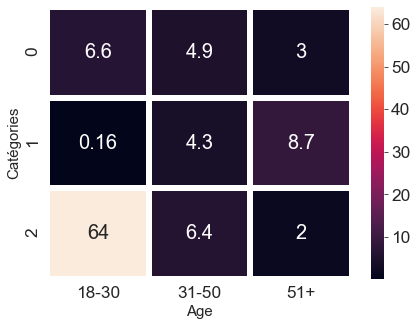

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(121)


sns.heatmap((mesure/xi_n)*100,annot=True, cbar=True, linewidths=5, annot_kws={"size": 20})

plt.ylabel('Catégories', fontsize=15)
plt.xlabel('Age', fontsize=15)

plt.savefig('24 - Tableau de contingence coloré_Catégorie_Age.jpg')

plt.show()
#plus la valeur s'approche de 100, plus il y a corrélation

<br/>Nous observons une importante corrélation entre les 18-30 ans et la catégorie 2. De plus, la p-value est égale à 0, le test est donc significatif.
Cependant, cette conclusion est à considérer avec précaution car nous avons précedemment vu qu'il y avait beaucoup de clients ayant renseignés 18 ans comme étant leur âge mais nous ne pouvons pas être sur de la véracité de cette information.
Concernant les autres catégories, nous ne voyons pas de différence majeur d'intérêt selon l'âge du client.

## Conclusion de l'analyse de corrélation<a id='conclusion2'></a>

<br/> •  Les 31-50 ans dépensent relativement plus, plus fréquemment et le panier moyen contient plus d'articles que pour les autres tranches d'âge. Mais ils sont davantage interessés par les catégories 1 et 0, qui ont des prix moins élevés que la catégorie 2.
<br/> •  Ce sont les 18-30 ans qui achètent davantage des produits de la catégorie 2, qui sont les produits les plus chers.
<br/> •  Ce sont les produits de la catégorie 1 qui intéressent le plus de clients différents, il s'agit d'une "catégorie tout public".
<br/> •  Nous ne pouvons pas déterminer de différence majeur entre chacun des sexes.